# <center>Project-Based Assignment CLO-4</center>

<b>Topik</b>
Implementation of Ensemble Method on Classification Task

<b>Anggota Kelompok</b>
1. Ramadhan Oktovivian Muhammad - 1301213040
2. I Ketut Yasa Seniarta - 1301210557
3. Aldian Prawira - 1301213439

# Latar Belakang

Dalam era digital saat ini, industri berita online telah menjadi bagian integral dari kehidupan sehari-hari, dengan informasi yang dapat diakses dengan cepat dan mudah. Memahami faktor-faktor yang memengaruhi popularitas sebuah berita, terutama melalui metrik jumlah shares, menjadi krusial untuk memahami perilaku pembaca dan meningkatkan strategi pemasaran. Data online news popularity yang mencakup variabel seperti judul, konten, waktu publikasi, dan aspek-aspek lainnya, menyajikan tantangan kompleks dalam pemodelan prediktif.

Penggunaan Ensemble Learning dalam konteks ini menjadi semakin relevan dan menarik. Dengan menggabungkan kekuatan beberapa model machine learning, seperti decision trees, random forests, dan gradient boosting, Ensemble Learning dapat meningkatkan ketepatan prediksi popularitas berita online. Keragaman model-model ini memungkinkan sistem untuk menangkap pola-pola kompleks yang mungkin terlewatkan oleh model tunggal, dan dengan demikian, memberikan gambaran yang lebih holistik tentang faktor-faktor yang berkontribusi terhadap kesuksesan suatu berita.

Selain itu, Ensemble Learning dapat membantu mengatasi ketidakpastian yang mungkin muncul dalam data online news, terutama mengingat dinamika cepat dan perubahan tren dalam industri ini. Dengan menggabungkan prediksi dari model-model yang berbeda, sistem dapat menjadi lebih adaptif terhadap variasi dalam perilaku pembaca dan perubahan tren yang cepat.

Dalam laporan ini, kita akan mengeksplorasi aplikasi Ensemble Learning dalam analisis popularitas berita online dengan fokus pada jumlah shares sebagai target utama. Melalui pendekatan ini, diharapkan dapat terungkap pola-pola unik dan faktor-faktor kunci yang mempengaruhi sejauh mana suatu berita menjadi viral. Penemuan ini tidak hanya berpotensi meningkatkan pemahaman tentang perilaku pembaca, tetapi juga memberikan wawasan berharga bagi praktisi dalam meningkatkan strategi pemasaran dan distribusi berita online.

# Eksplorasi dan PreProcessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import gdown

## Load Data

In [2]:
# Load Data
file_id = '1vNAuas5tHEWDPoiLPHDo_Gd7_-pdTeHd'
download_link = f'https://drive.google.com/uc?id={file_id}'
output_file = 'OnlineNewsPopularity.csv'

gdown.download(download_link, output_file, quiet=False)
df = pd.read_csv(output_file)

Downloading...
From: https://drive.google.com/uc?id=1vNAuas5tHEWDPoiLPHDo_Gd7_-pdTeHd
To: /content/OnlineNewsPopularity.csv
100%|██████████| 24.3M/24.3M [00:00<00:00, 45.2MB/s]


In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.shape

(39644, 61)

## Mendapatkan informasi dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

## Menghilangkan duplikasi data

In [6]:
# removing duplicates
df=df.drop_duplicates()

In [7]:
df.shape  # there are no duplicates

(39644, 61)

In [8]:
#checking for all variables that contain missing values
n=df.isna().sum()
n[n>0]

Series([], dtype: int64)

In [9]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [10]:
df.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

Gain informasi persebaran dari data

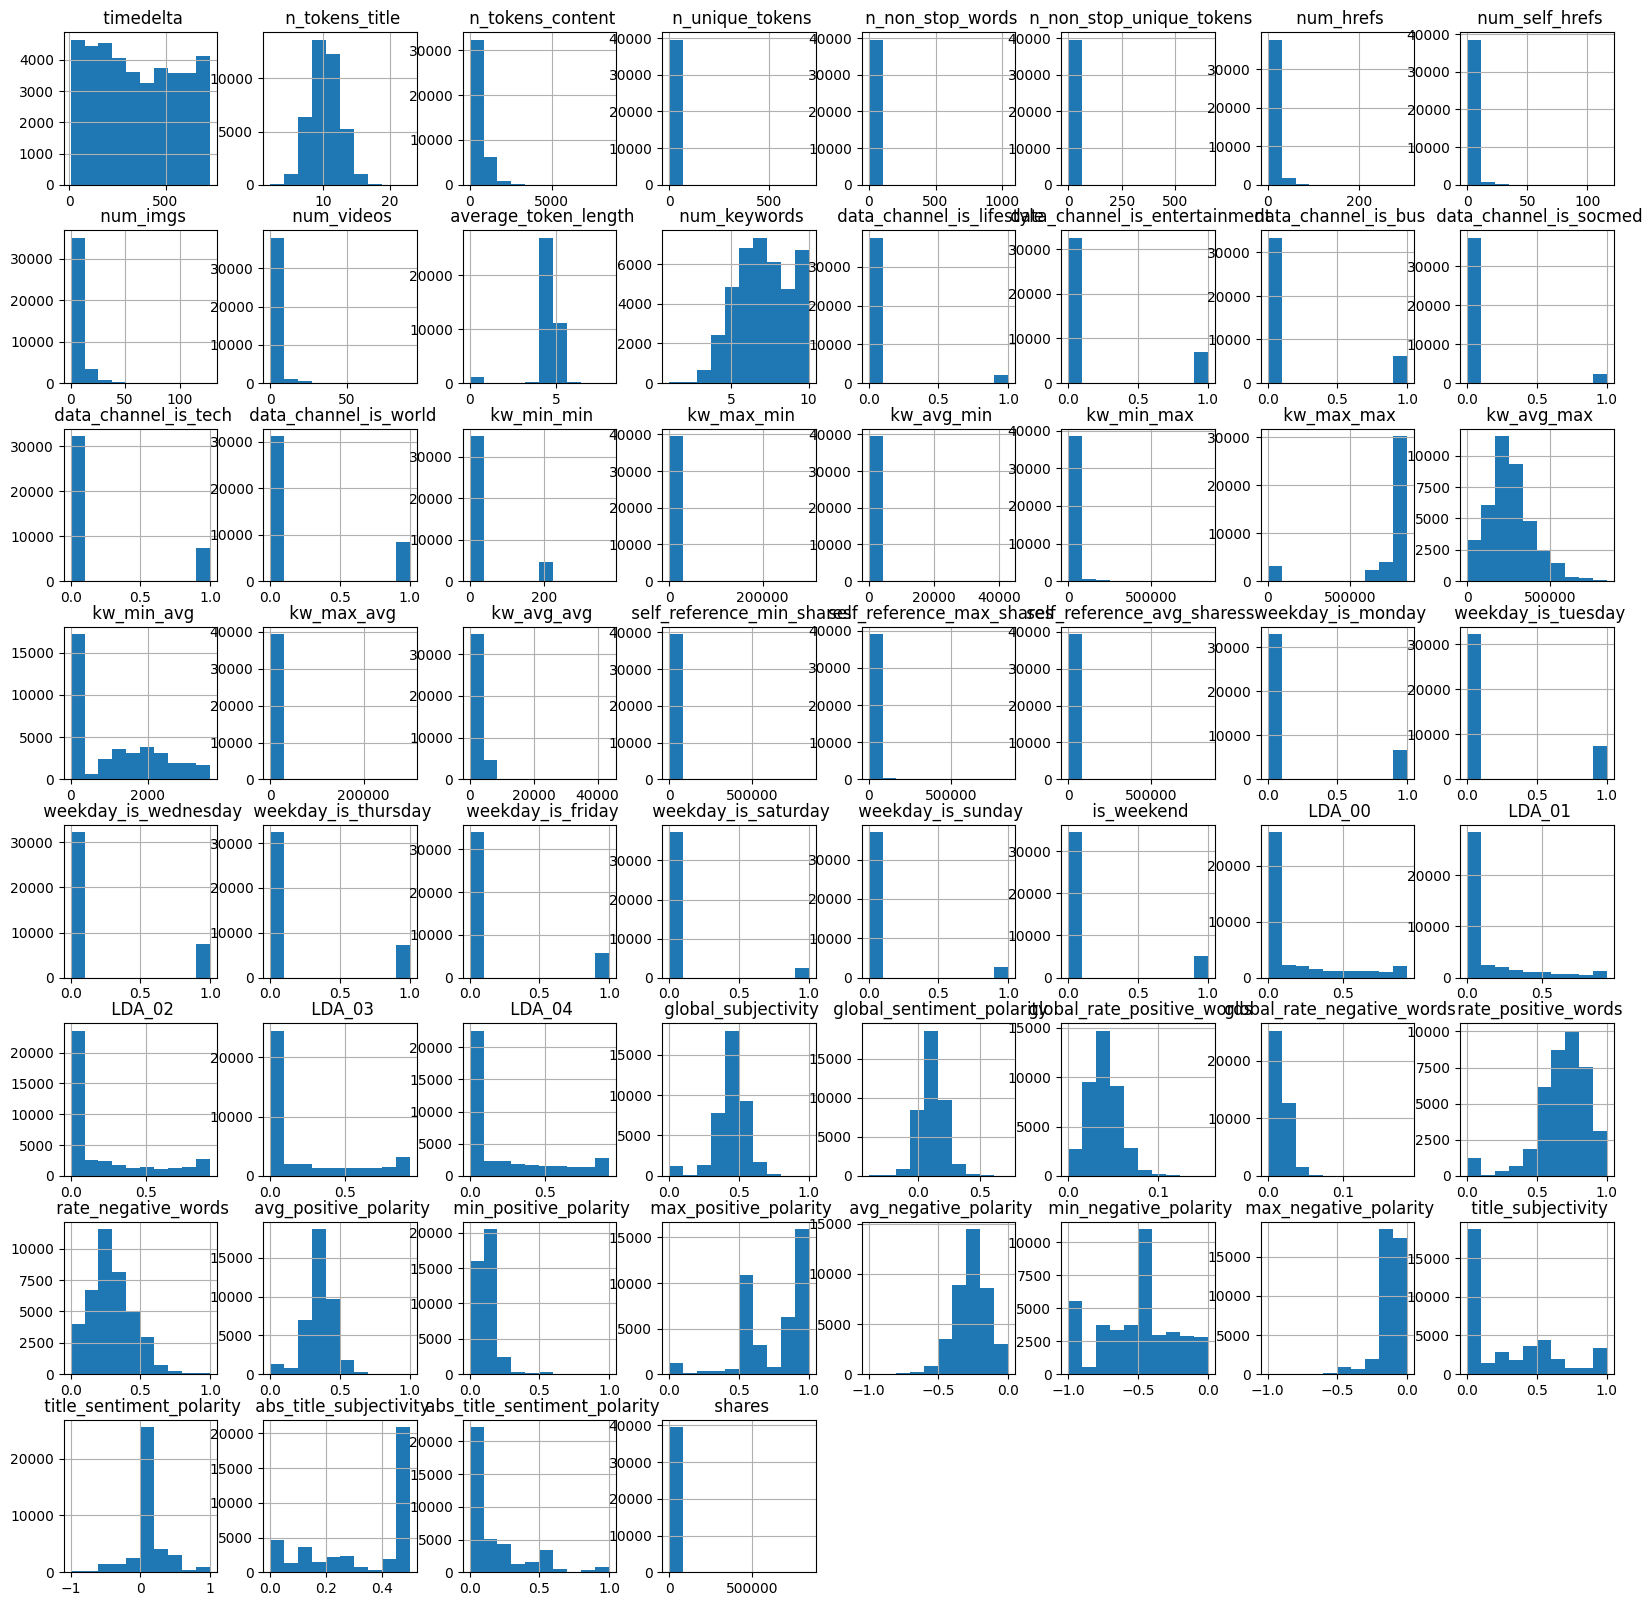

In [11]:
df.hist(figsize=(20,20))
plt.show()

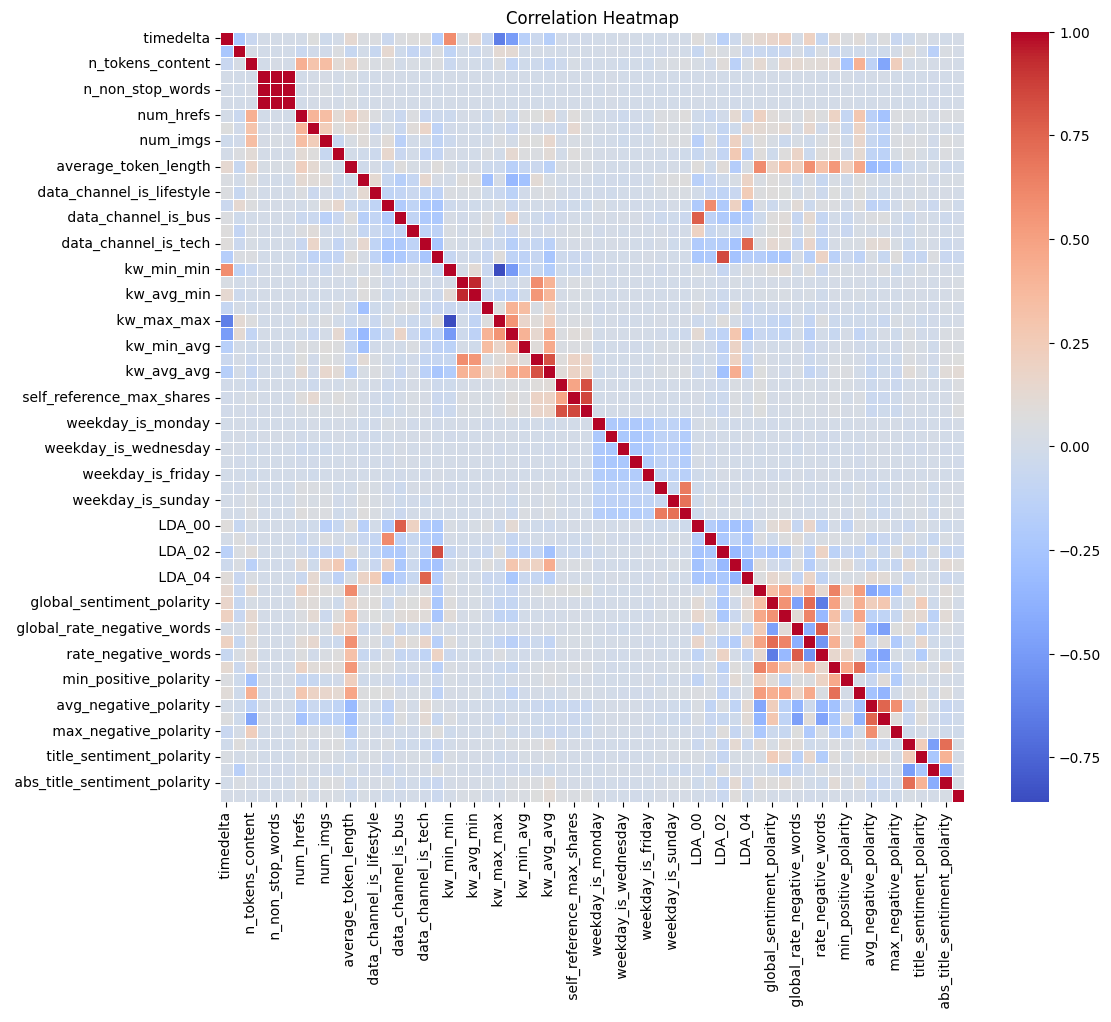

In [12]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Prepocoessing

In [13]:
#Removing Space Character from Feature names
df.columns=df.columns.str.replace(" ","")

In [14]:
# find number of rows that contain 0 for n_tokens_content
num_of_nowords=df[df['n_tokens_content']==0].index
print('Banyaknya artikel kosong',num_of_nowords.size)

Banyaknya artikel kosong 1181


In [15]:
# Drop these items or rows with n_tokens_content = 0
df = df[df['n_tokens_content'] != 0]

In [16]:
# Drop uncorrelated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"
df = df.drop('url',axis=1)
df = df.drop('timedelta',axis=1)
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [17]:
#Understanding target variable distribution
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [18]:
df['shares'].median()

1400.0

In [19]:
# Create a new target variable
df['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

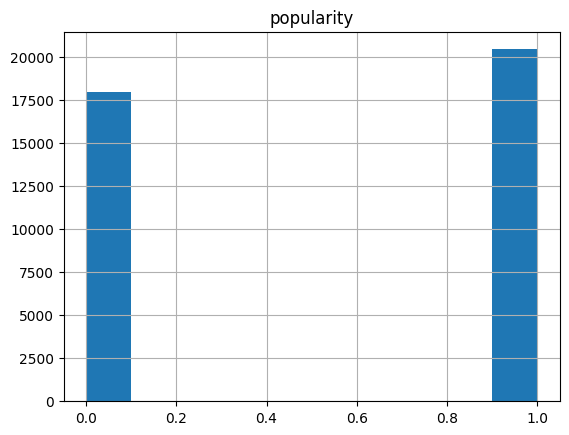

In [20]:
df.hist(column='popularity');

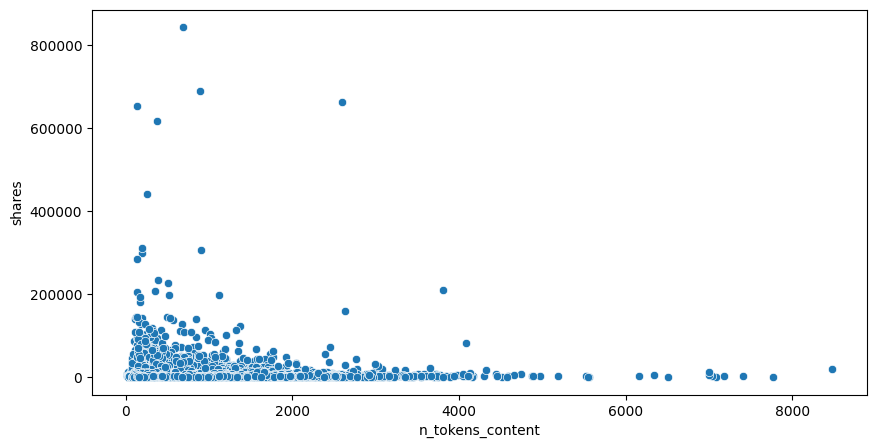

In [21]:
# Jumlah kata dalam konten vs Jumlah share
plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=df)

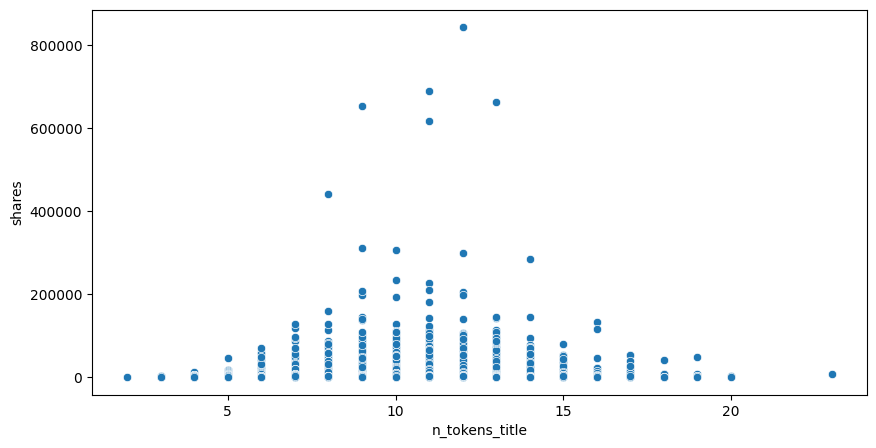

In [22]:
# Jumlah kata dalam judul vs Jumlah share

plt.figure(figsize=(10, 5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df)
plt.show()

In [23]:
a,b = df['shares'].mean(),df['shares'].median()

In [24]:
print(f'Mean shares = {a}')
print(f'Median share = {b}')

Mean shares = 3355.3603983048642
Median share = 1400.0


In [25]:
Wday = df.columns.values[26:33]
Wday

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

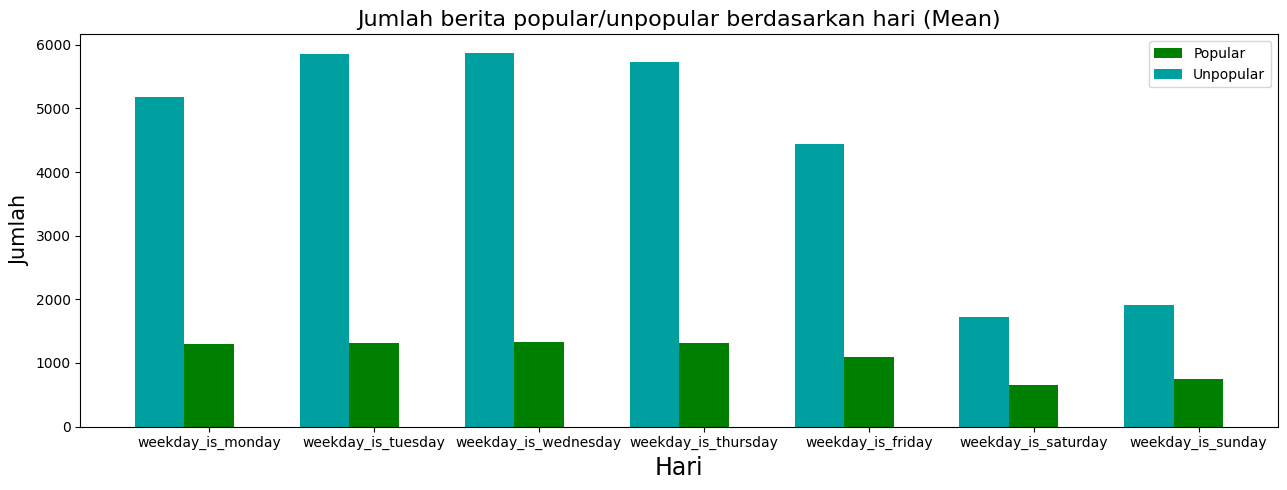

In [26]:
Unpop=df[df['shares']<a]
Pop=df[df['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Jumlah berita popular/unpopular berdasarkan hari (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('Jumlah',fontsize=15)
plt.xlabel('Hari',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

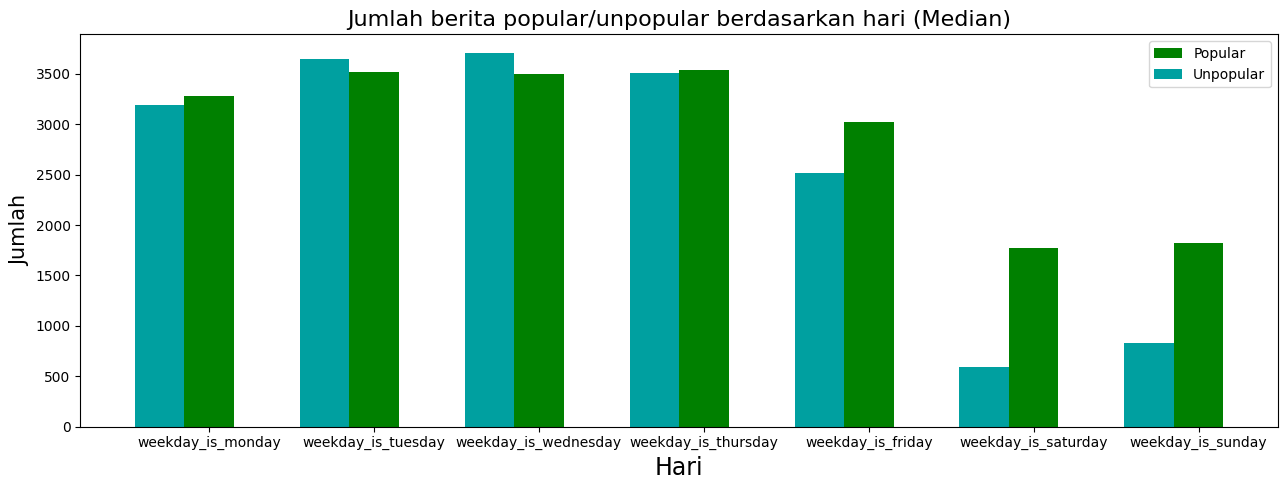

In [27]:
Unpop=df[df['shares']<b]
Pop=df[df['shares']>=b]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Jumlah berita popular/unpopular berdasarkan hari (Median)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('Jumlah',fontsize=15)
plt.xlabel('Hari',fontsize=17)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [28]:
Dc=df.columns[9:15]
Dc

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

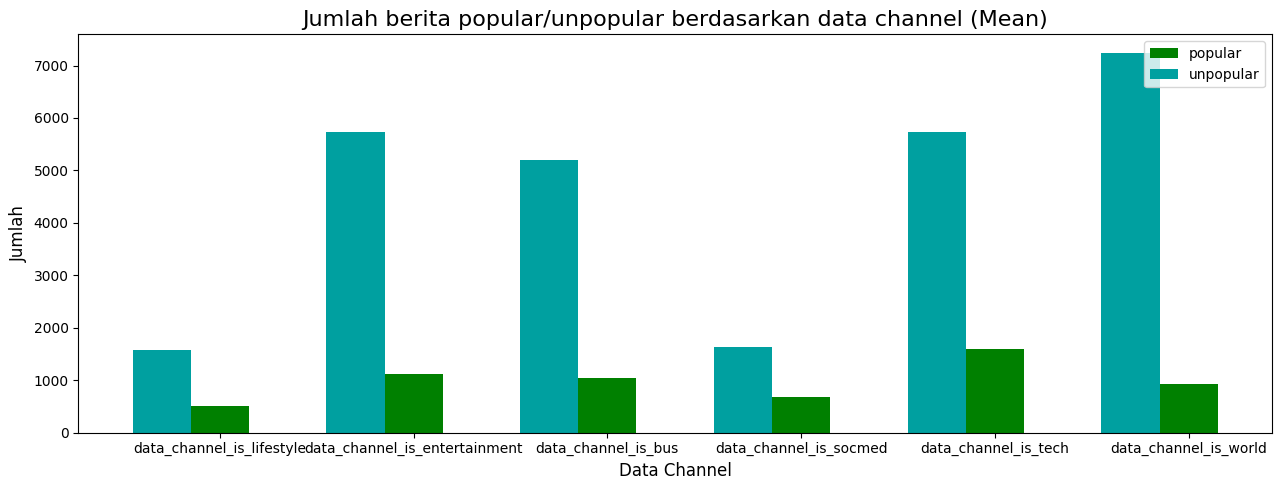

In [29]:
Unpop3=df[df['shares']<a]
Pop3=df[df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Jumlah berita popular/unpopular berdasarkan data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Jumlah", fontsize = 12)
plt.xlabel("Data Channel", fontsize = 12)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

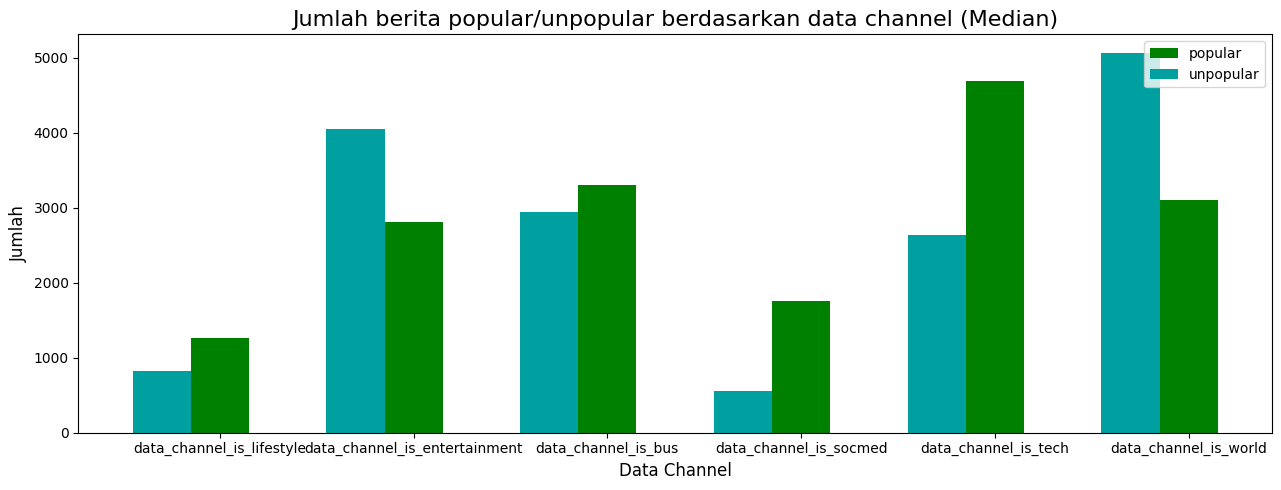

In [30]:
Unpop3=df[df['shares']<b]
Pop3=df[df['shares']>=b]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Jumlah berita popular/unpopular berdasarkan data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Jumlah", fontsize = 12)
plt.xlabel("Data Channel", fontsize = 12)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

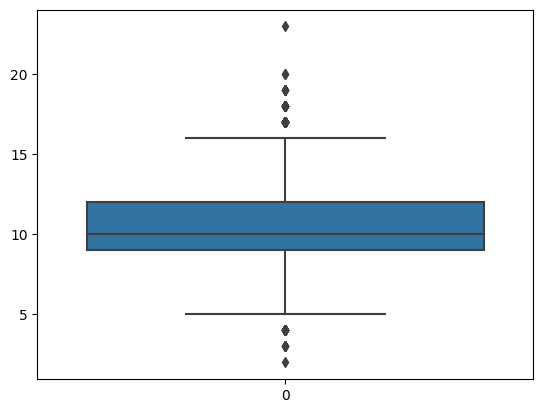

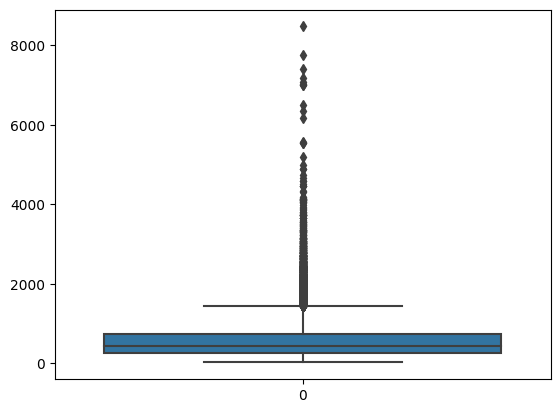

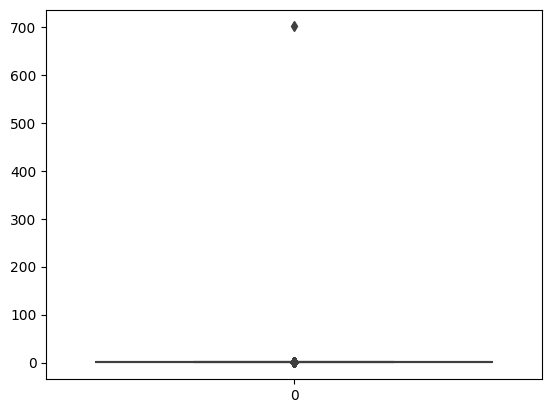

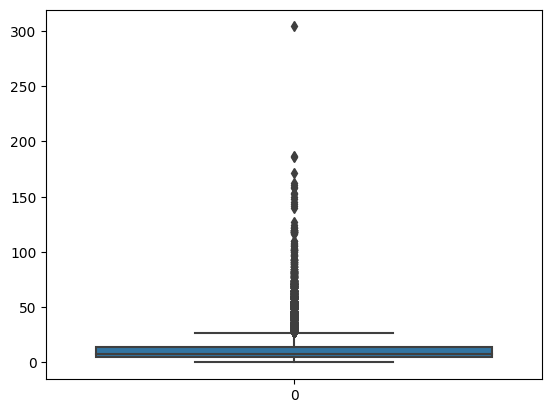

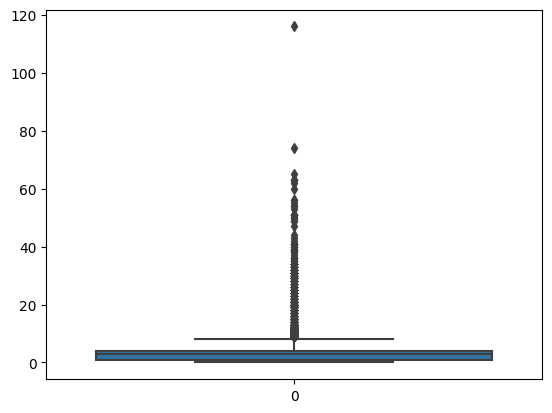

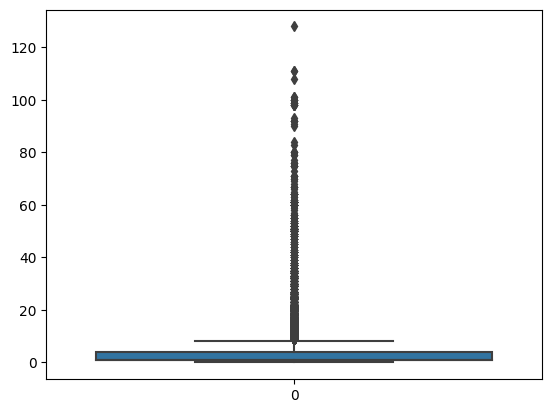

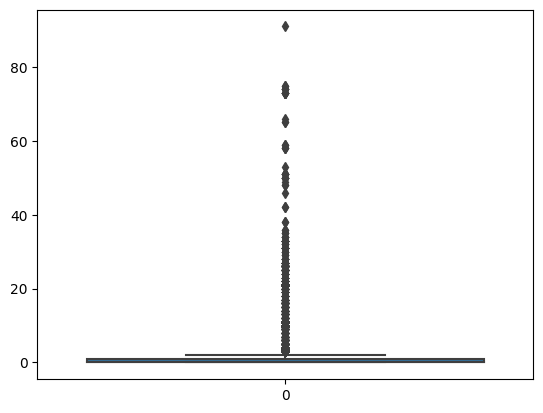

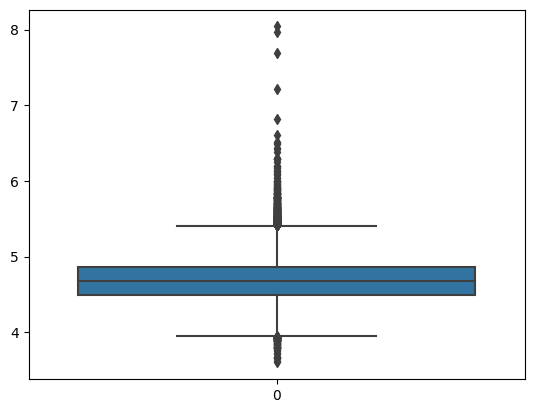

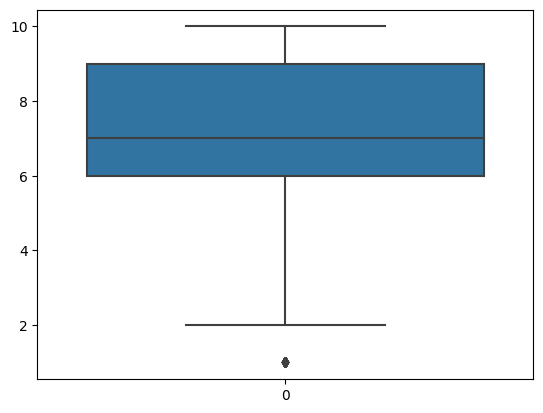

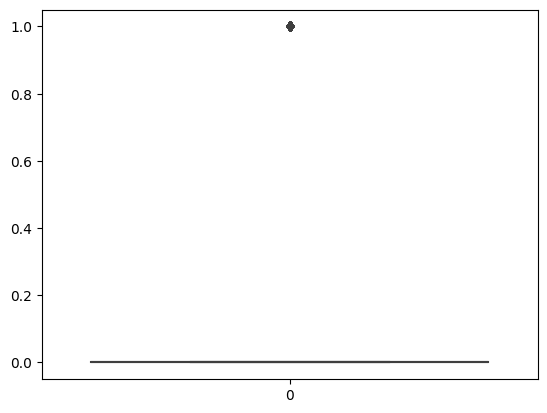

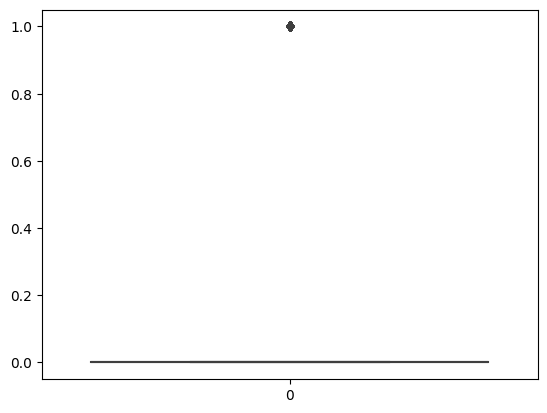

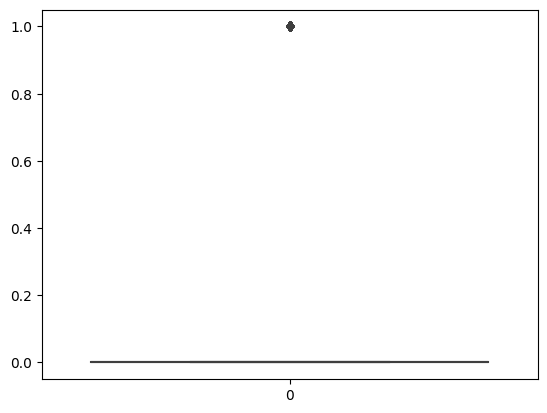

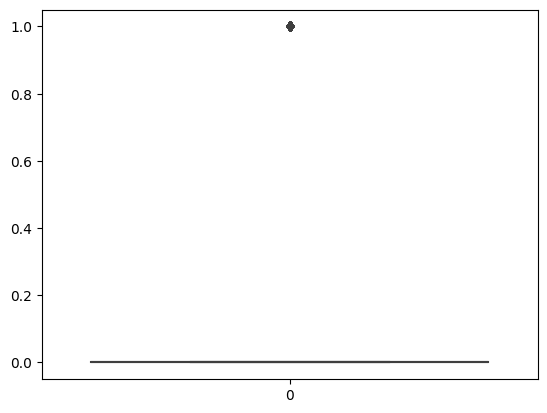

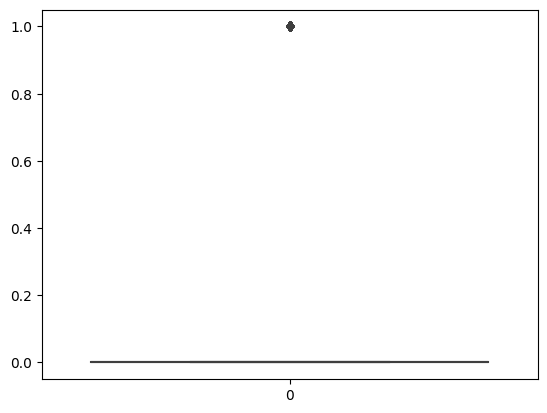

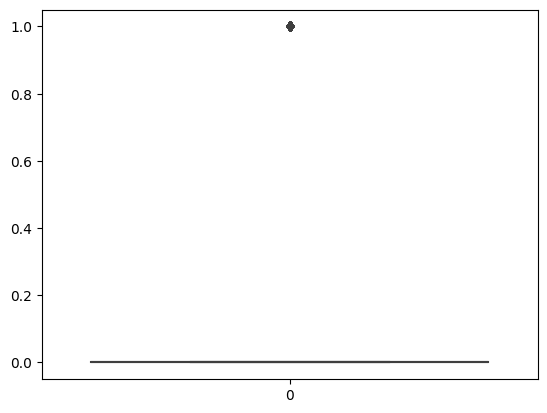

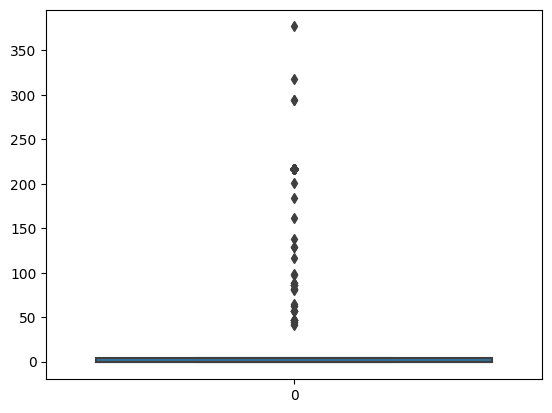

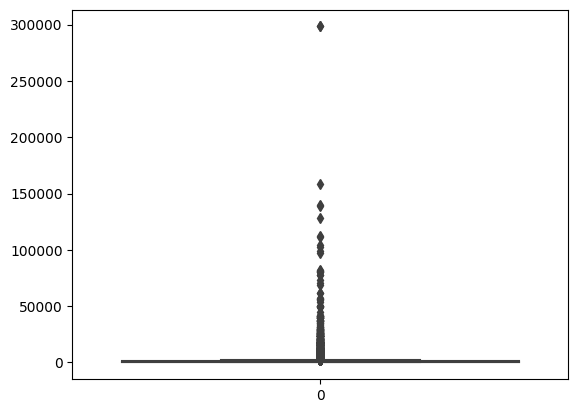

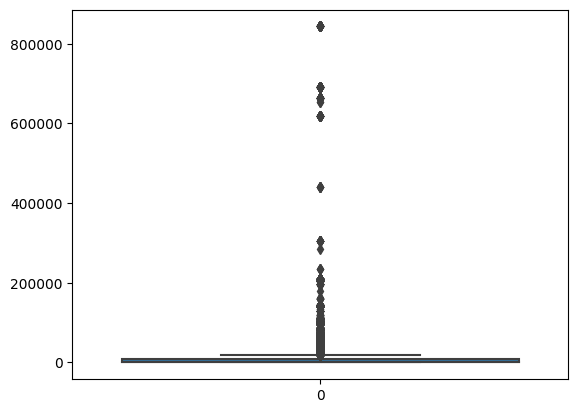

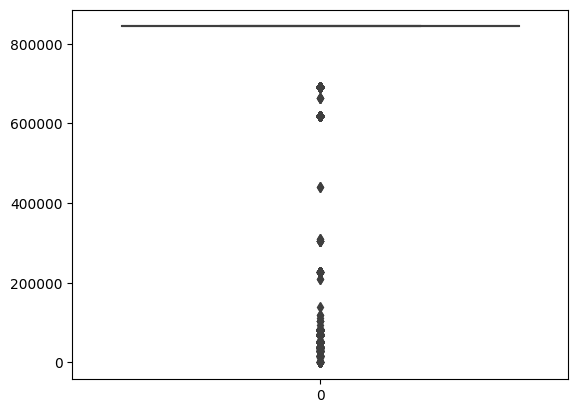

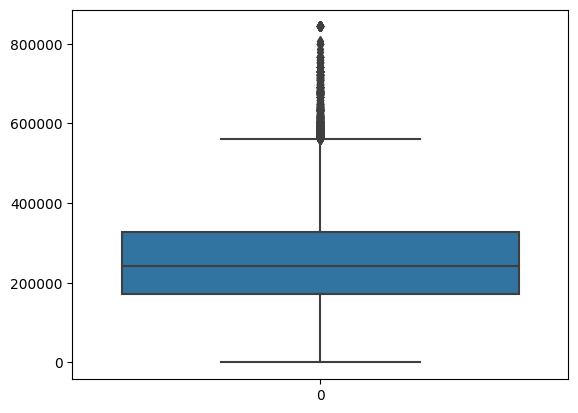

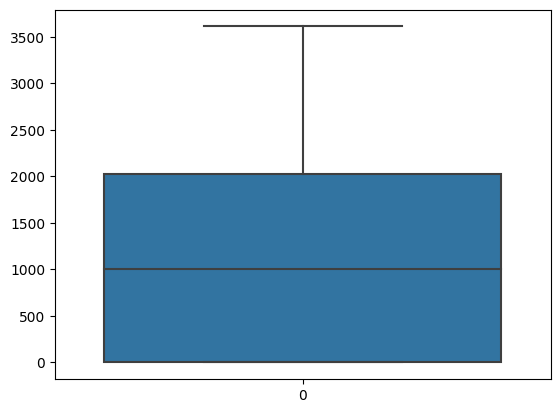

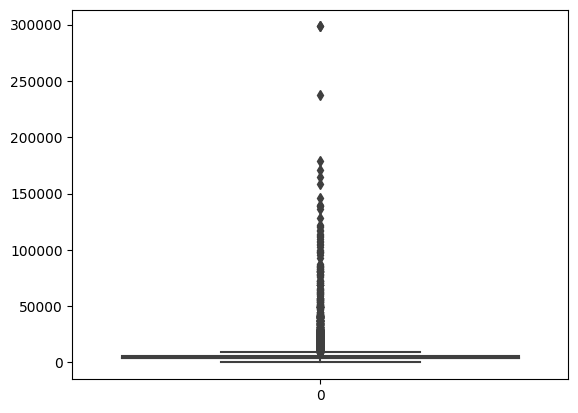

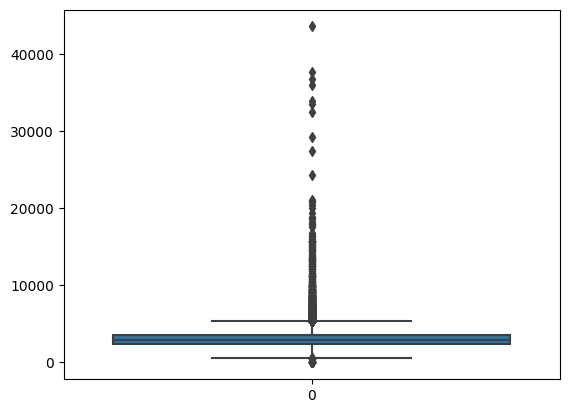

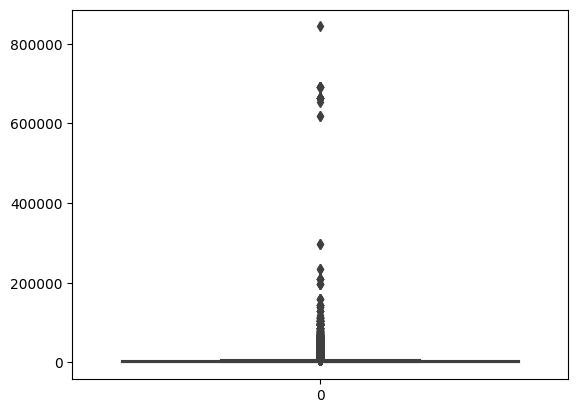

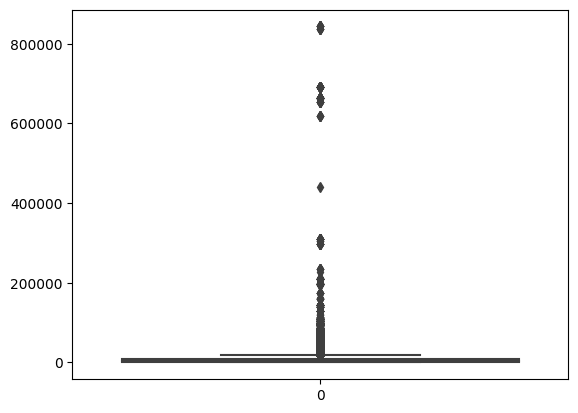

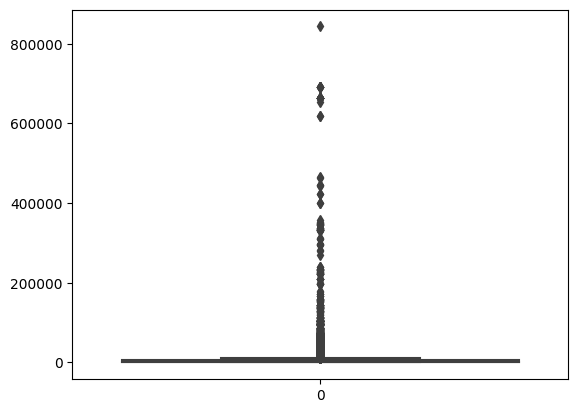

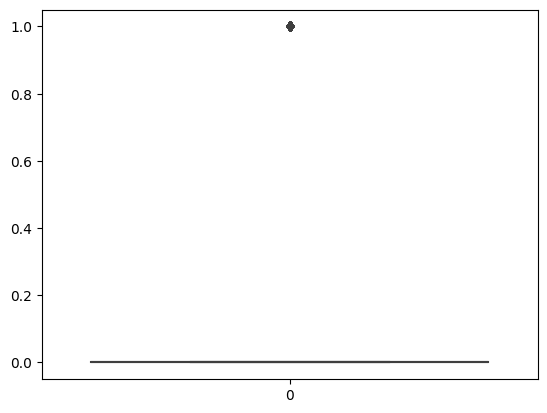

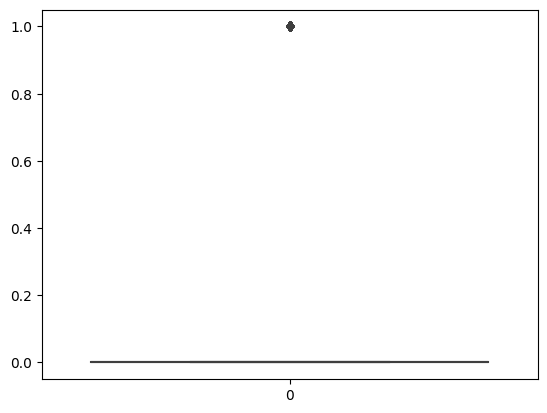

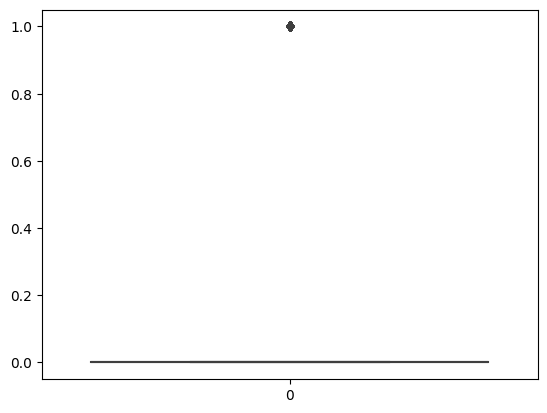

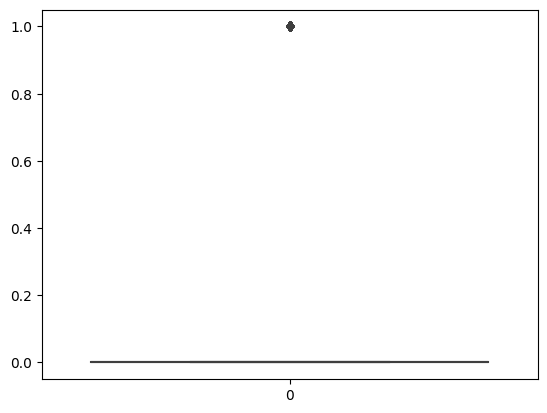

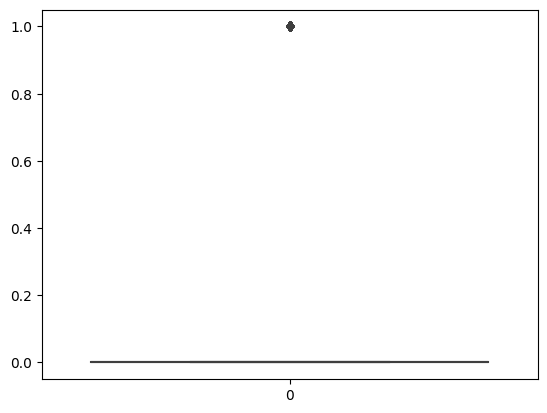

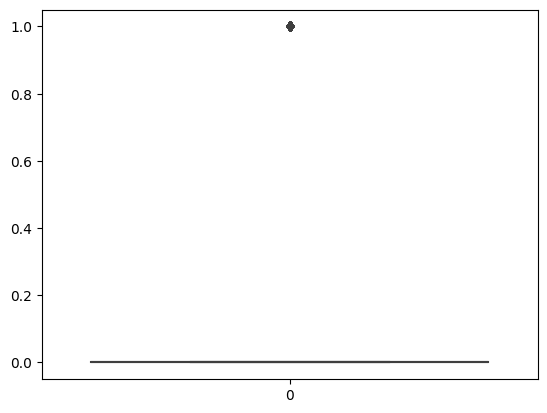

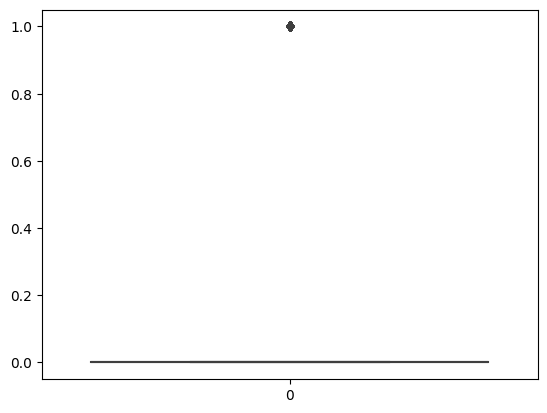

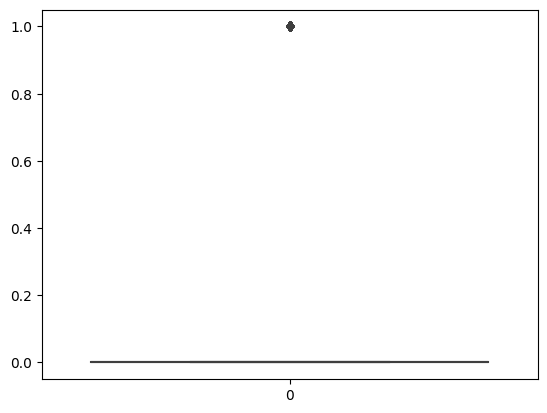

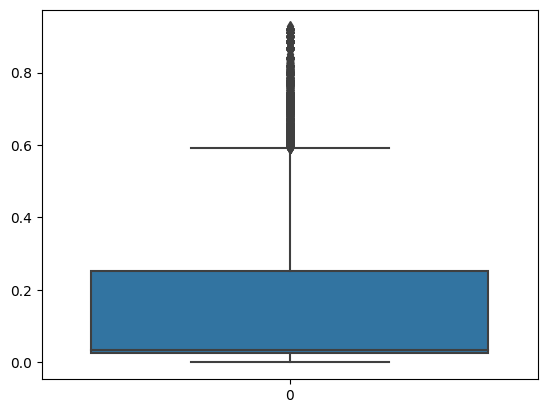

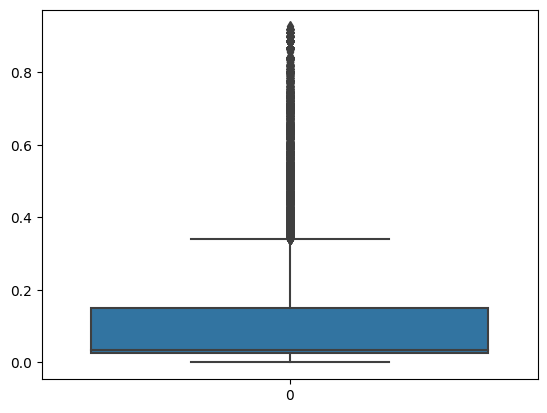

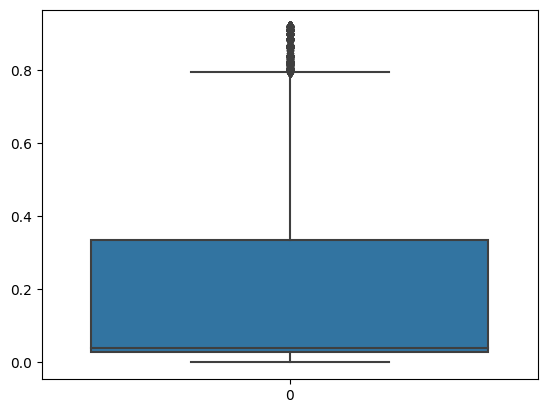

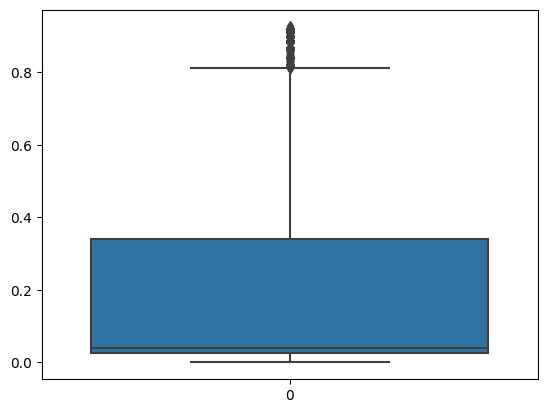

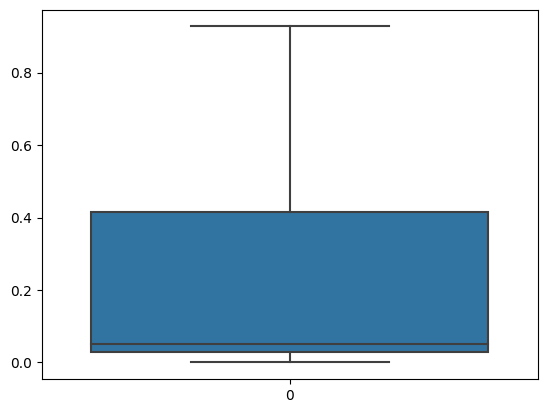

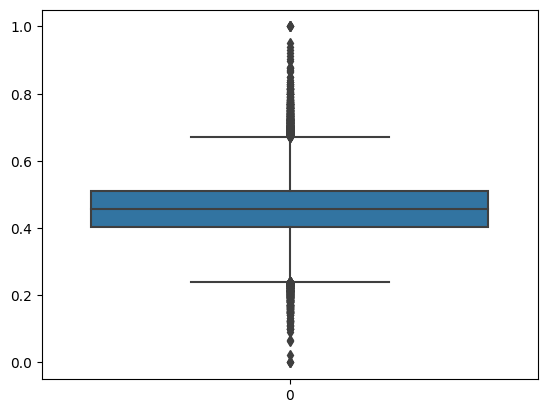

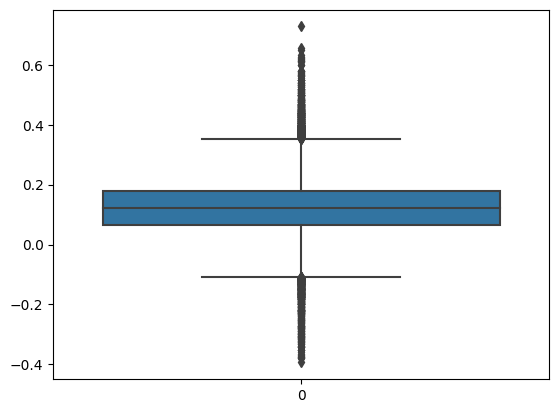

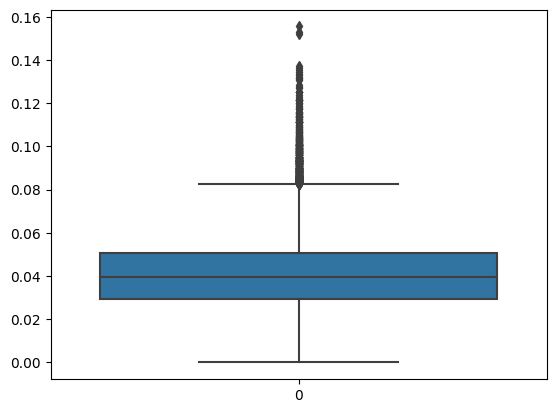

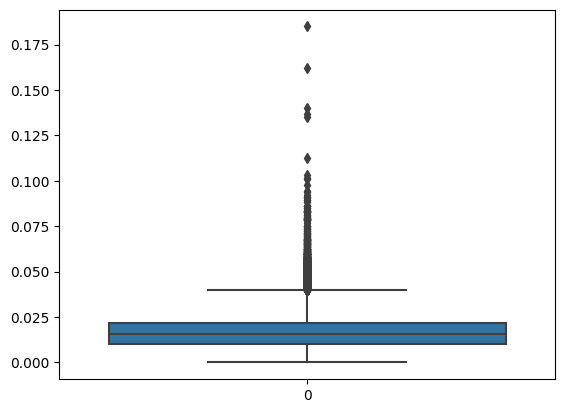

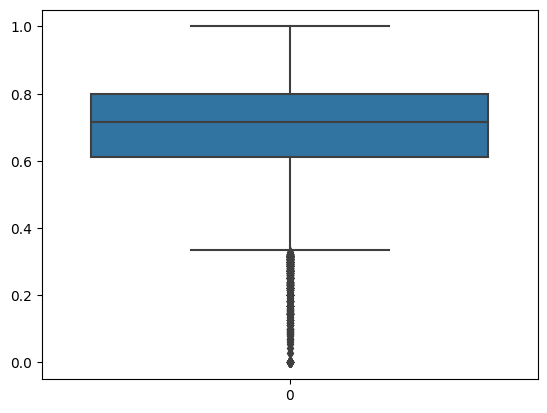

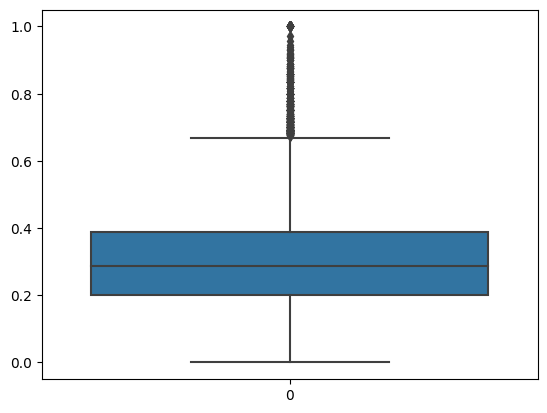

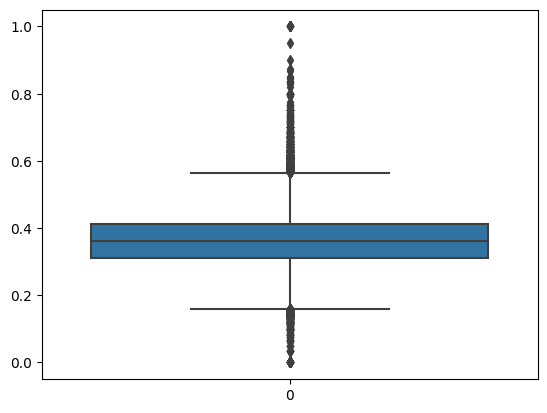

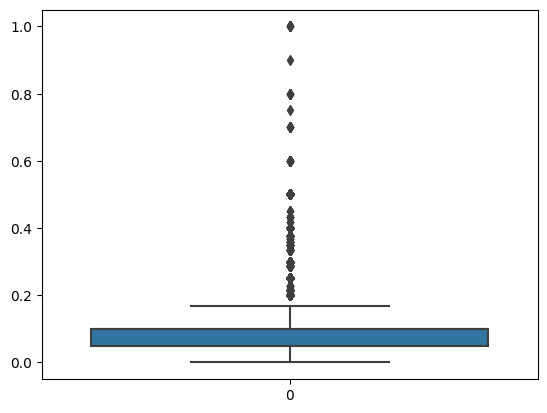

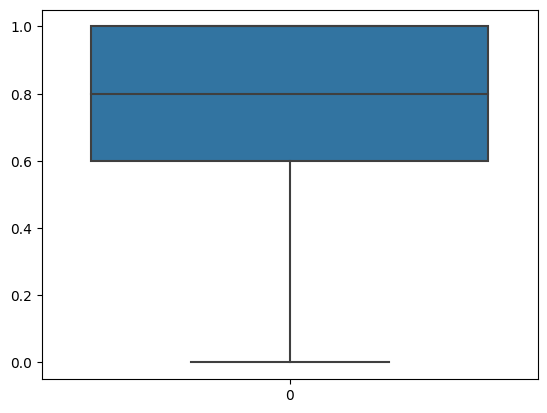

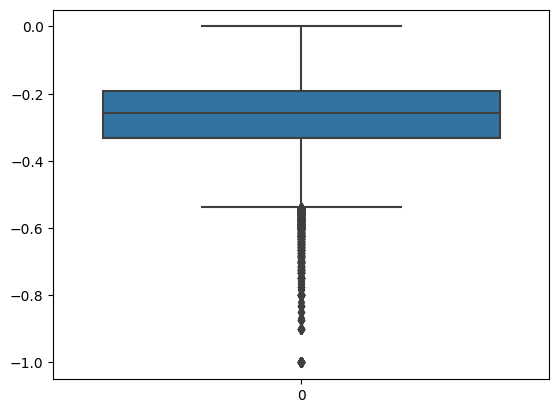

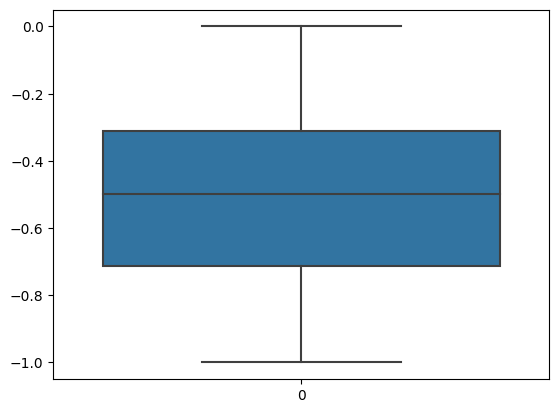

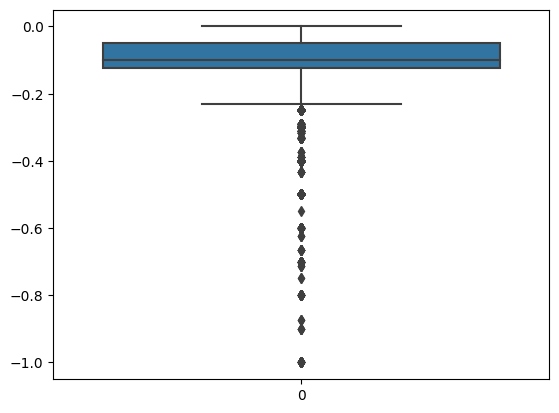

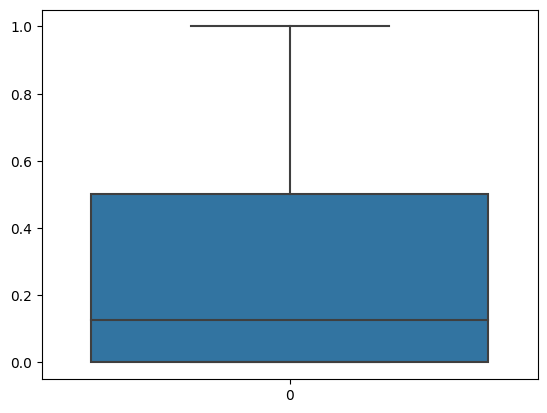

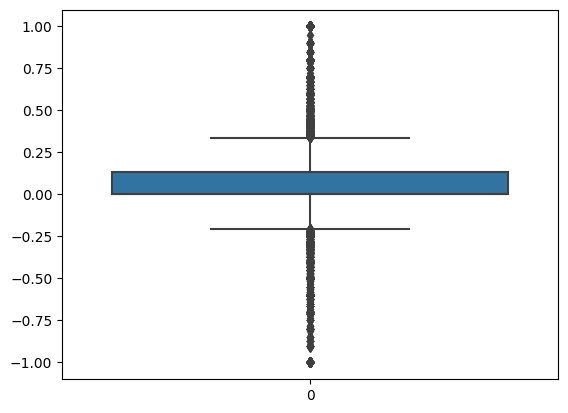

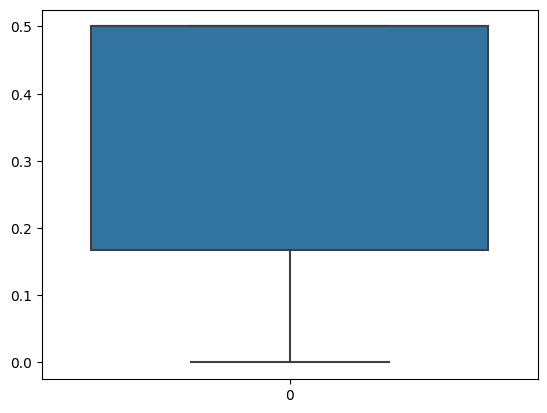

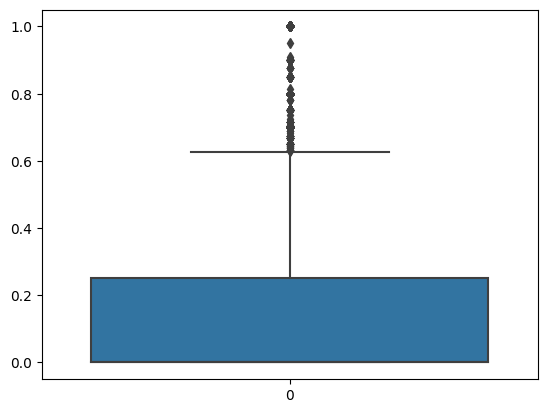

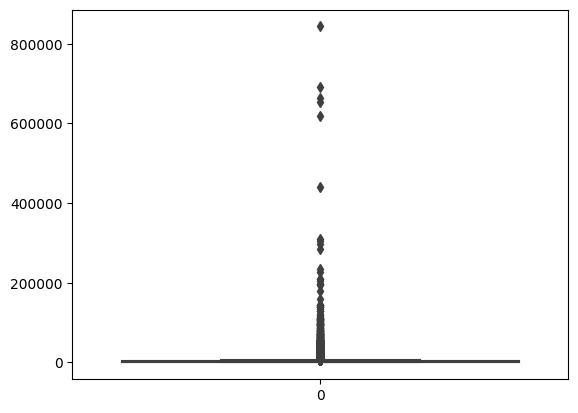

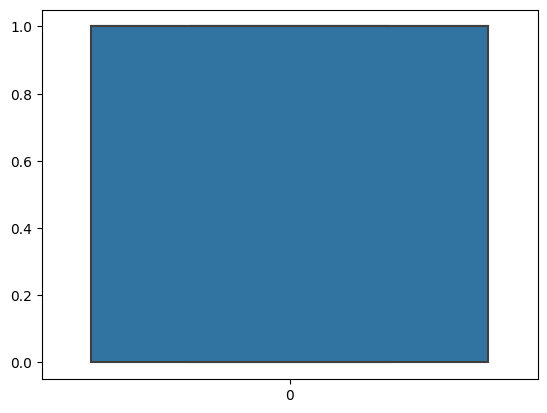

In [31]:
num_cols = df.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df[num_cols[i]])
    plt.show()

In [32]:
for column in num_cols:
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 155
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 490
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "num_hrefs" : 2636
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7466
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2939
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 552
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2077
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 6856
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6235
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2311
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7325
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 8168

In [33]:
# df2_num  dataframe contains numerical feaures.

df2_num=df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagoricl features.

df2_cat=df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [34]:
# Hapus variabel target dari df2_num
df2_num = df2_num.drop('shares',axis=1)

In [35]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [36]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [37]:
#mengonversi nilai negatif menjadi nilai positif
for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [38]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_v

In [39]:
# Droping old negative column

for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [40]:
# Checking negative columns

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [41]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [42]:
#Treating outlier :

for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

In [43]:
# Checking outliers again

num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:
    q1 = df2_num_add[column].quantile(0.25)    # First Quartile
    q3 = df2_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
3.0351766196848686
9.255141622951946
1.5549912508167694
Number of outliers in "n_tokens_content" : 0
3.8606109358471805
7.438987854892925
0.8945942297614362
Number of outliers in "n_unique_tokens" : 521
-1.1447330856397202
-0.1145799574171531
0.2575382820556418
Number of outliers in "average_token_length" : 0
0.7213218976211406
0.7805063649014632
0.01479611682008064
Number of outliers in "num_keywords" : 0
0.08898030896099218
14.927545776135672
3.7096413667936696
Number of outliers in "num_hrefs_new" : 0
0.549171638846343
3.43450060777549
0.7213322422322868
Number of outliers in "num_self_hrefs_new" : 0
-0.6296914342191073
2.872819482290186
0.8756277291273233
Number of outliers in "num_imgs_new" : 0
-0.16197366610802344
1.8075267721179116
0.4923751095564838
Number of outliers in "num_videos_new" : 0
-0.6194220377541412
1.0323700629235686
0.41294802516942747
Number of outliers in "kw_min_min_new" : 0
-1.7368309261901067
2.8947182103168445
1.157

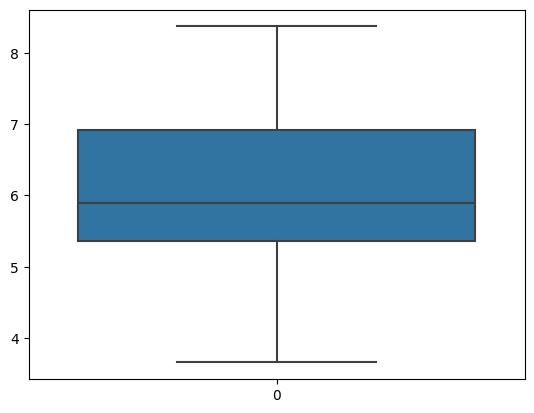

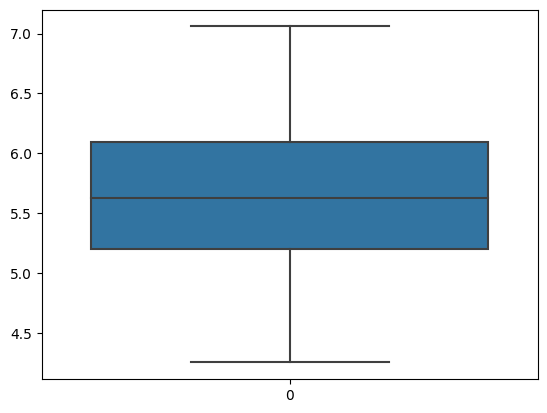

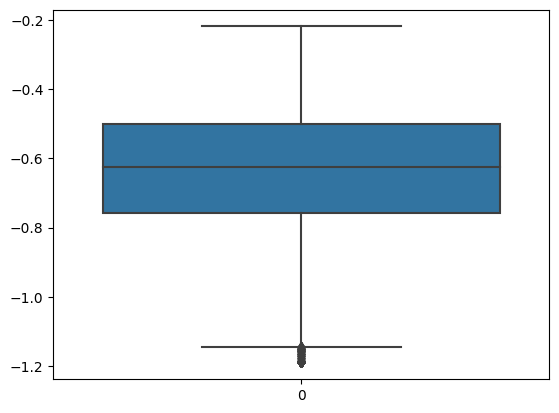

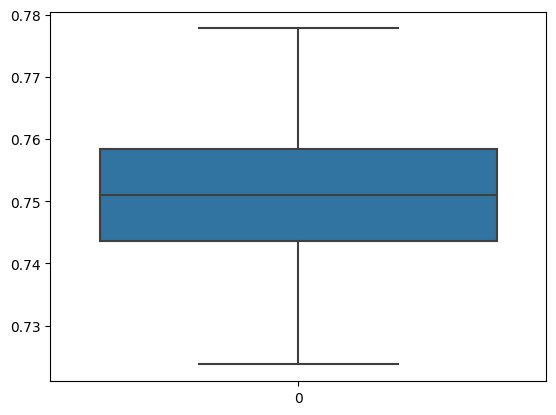

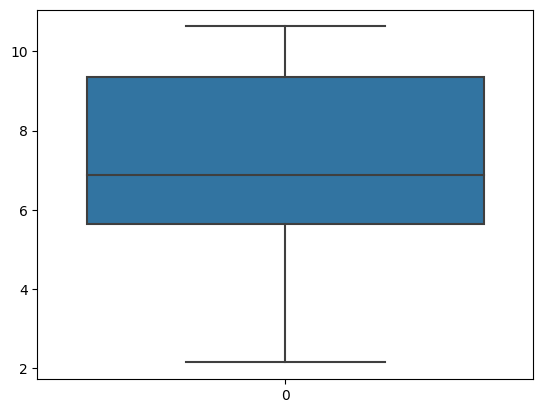

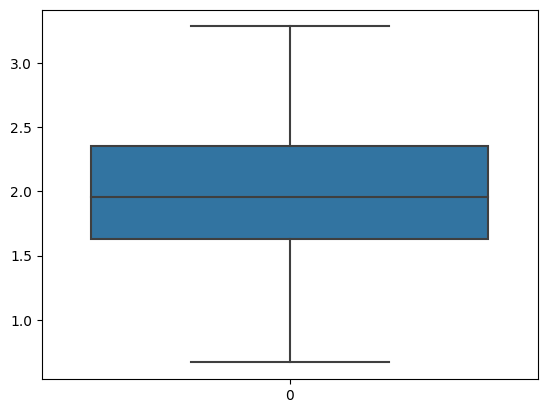

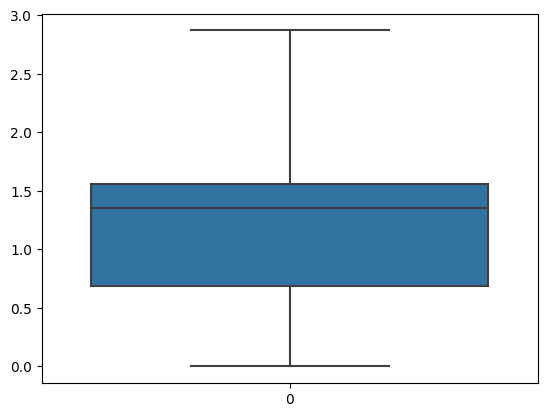

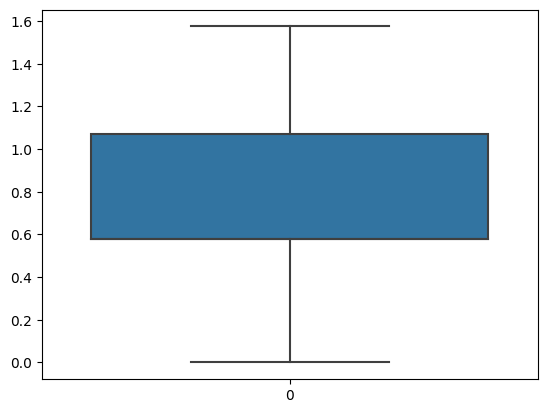

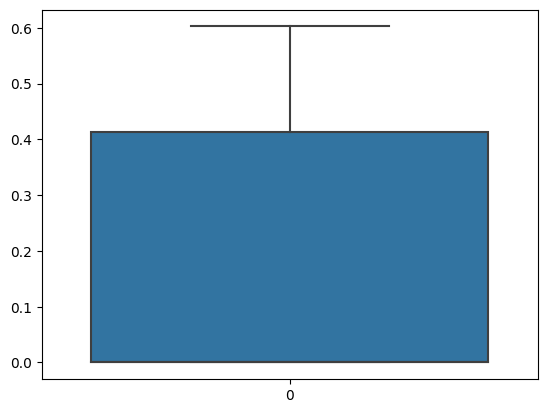

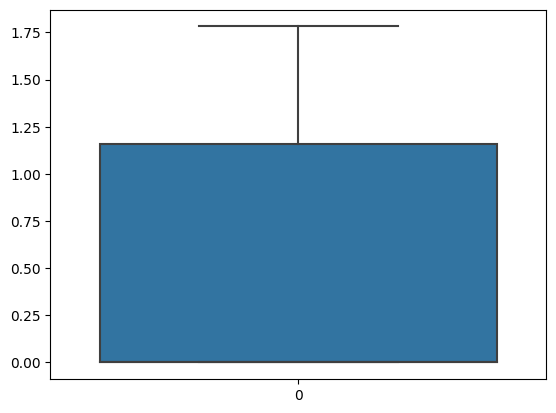

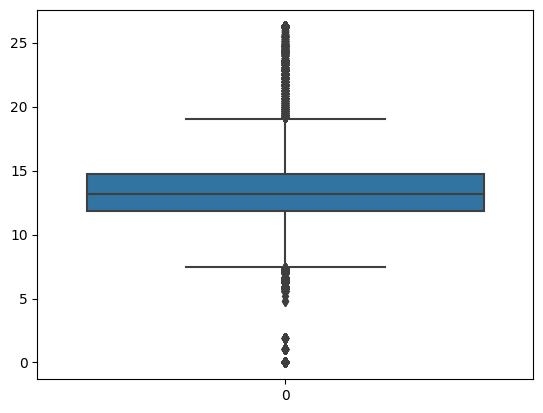

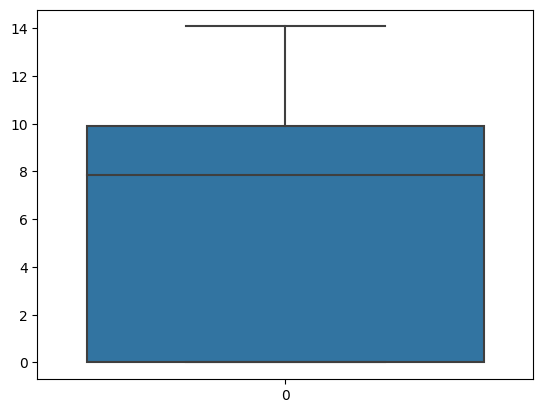

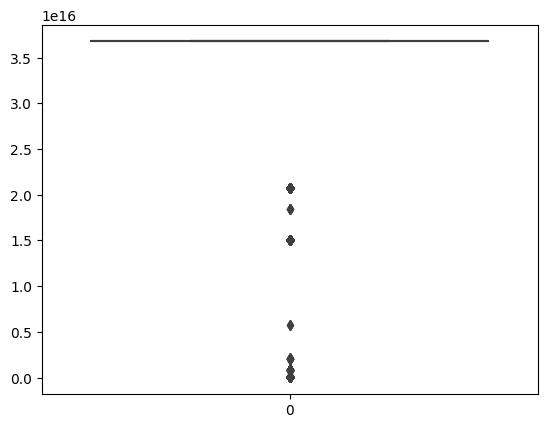

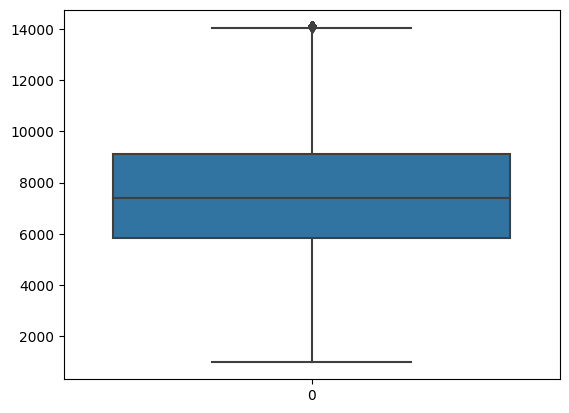

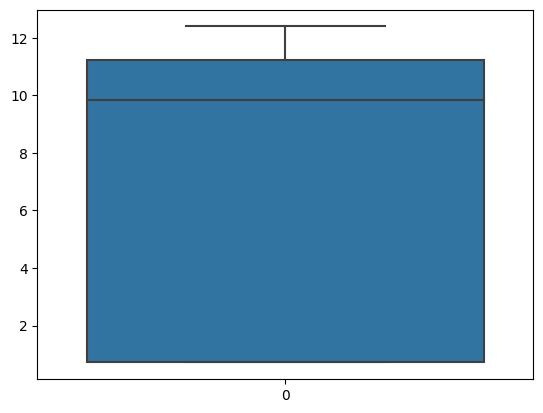

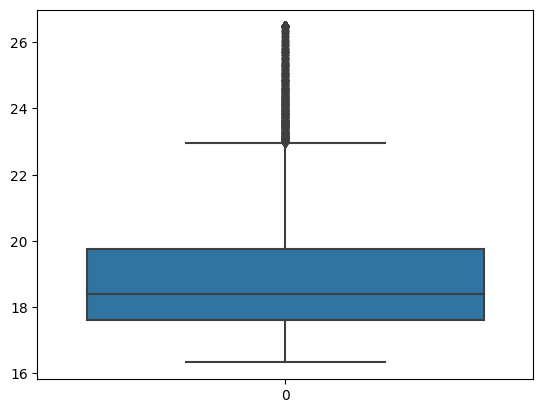

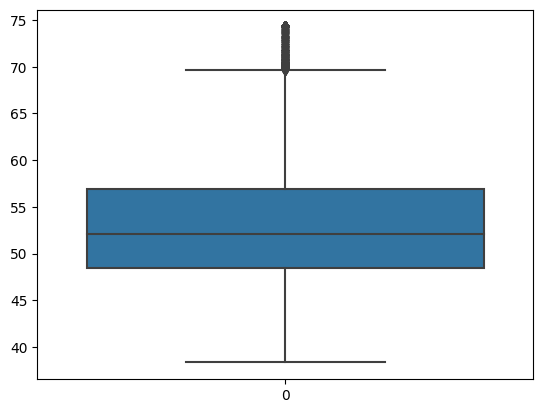

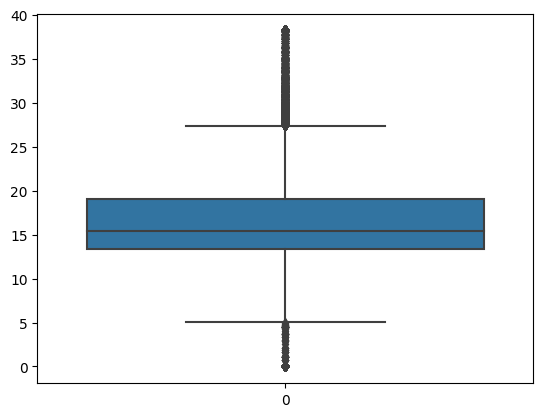

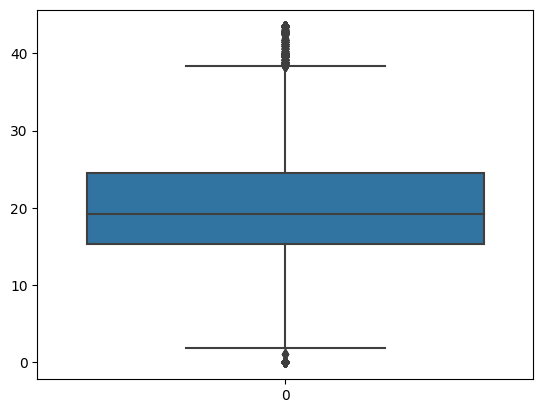

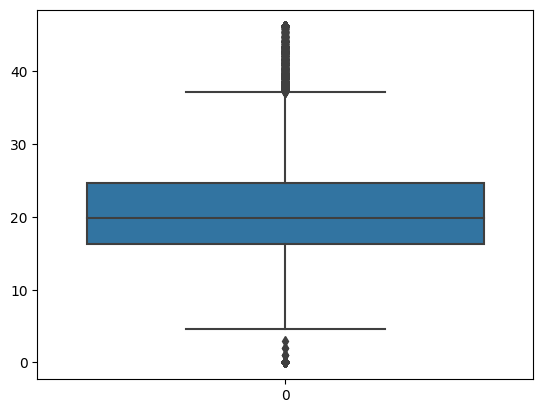

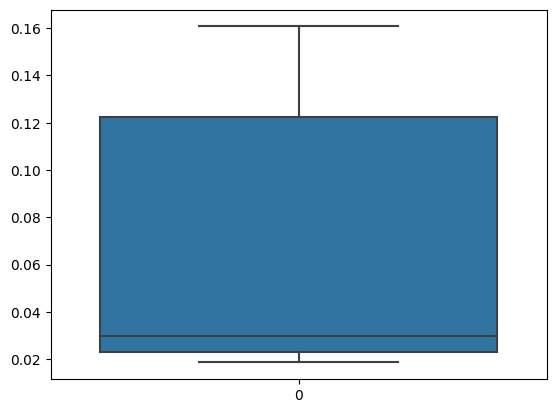

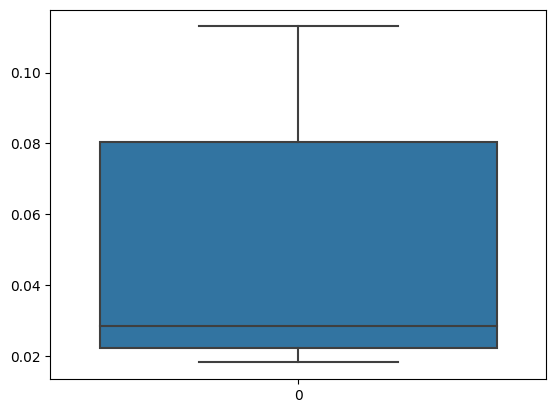

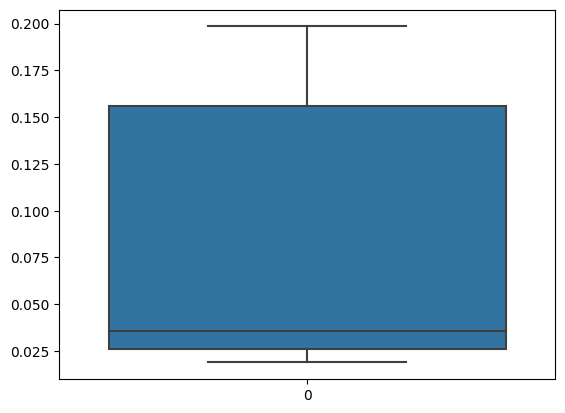

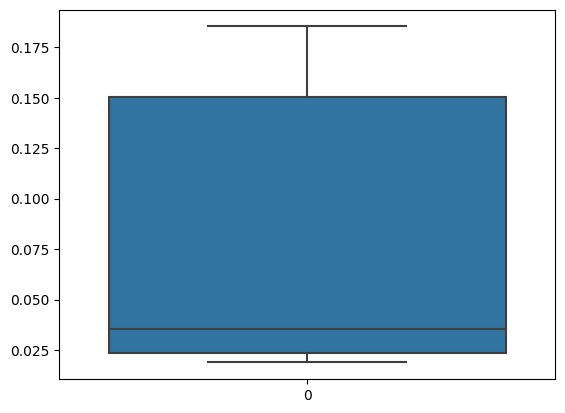

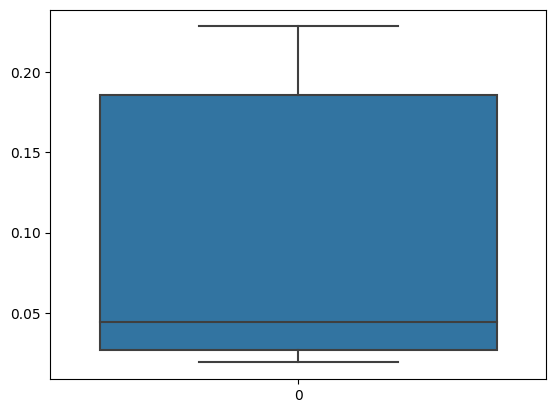

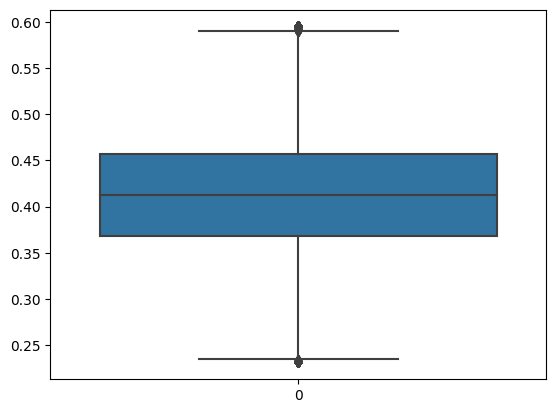

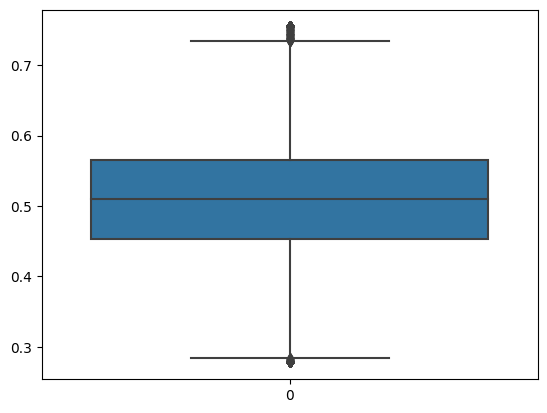

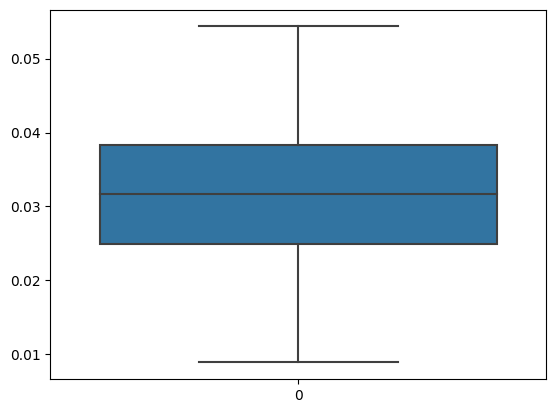

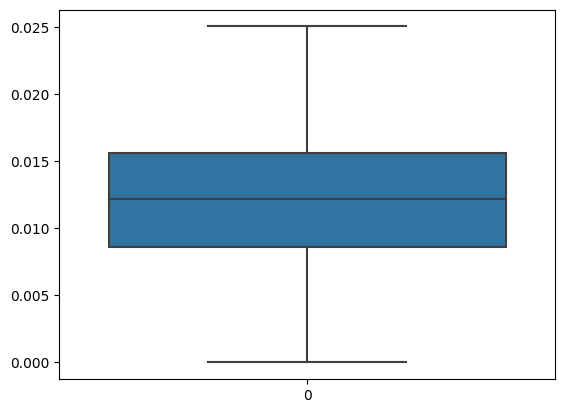

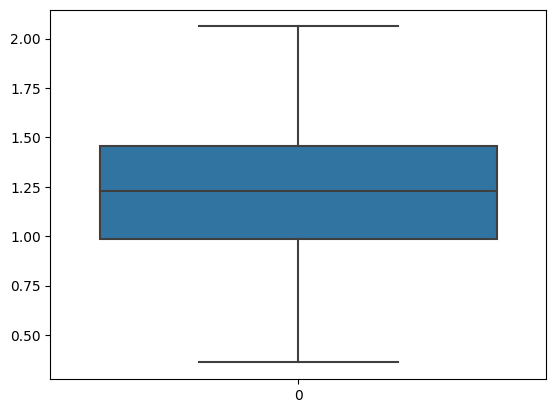

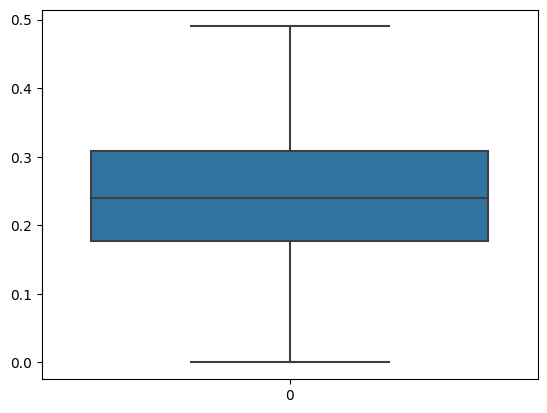

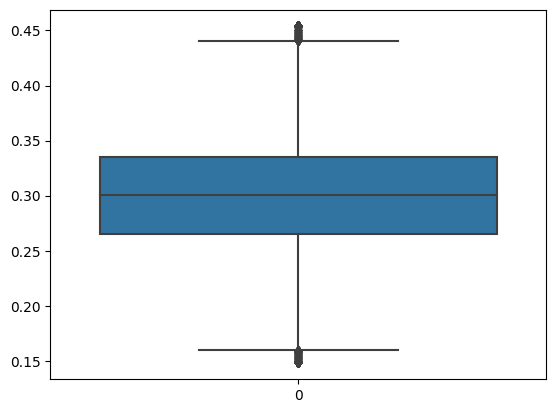

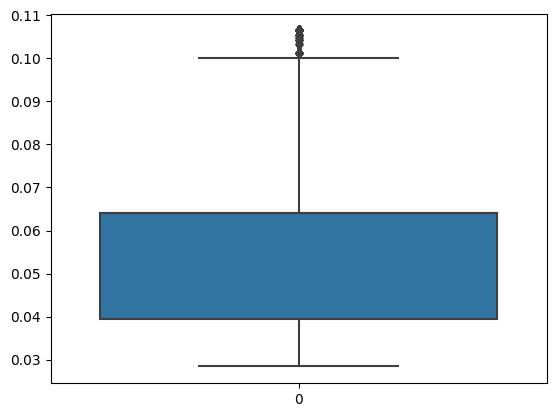

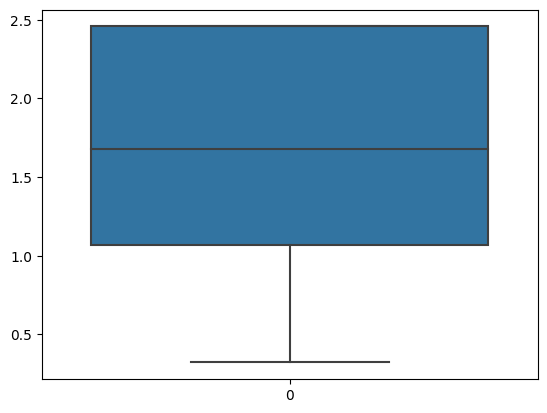

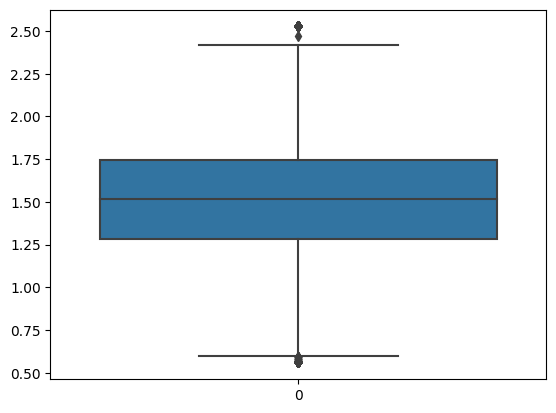

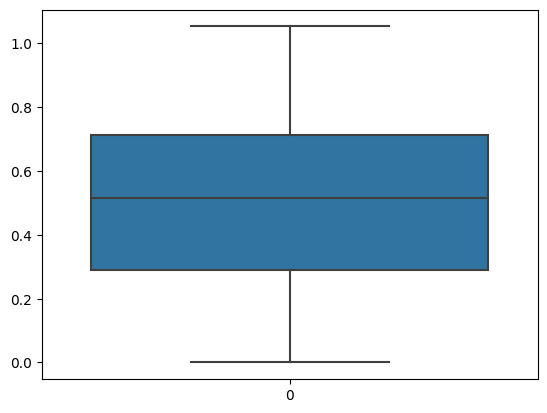

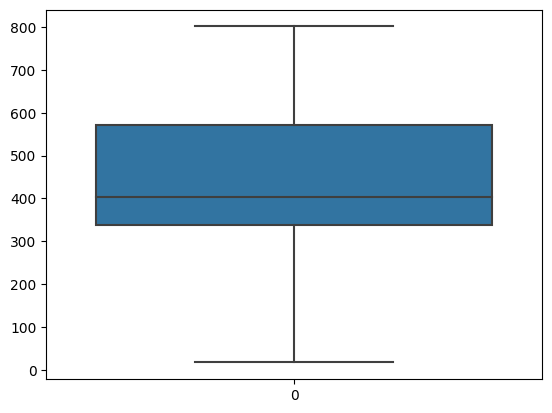

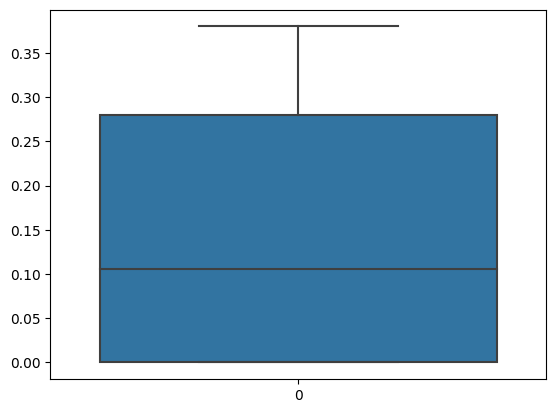

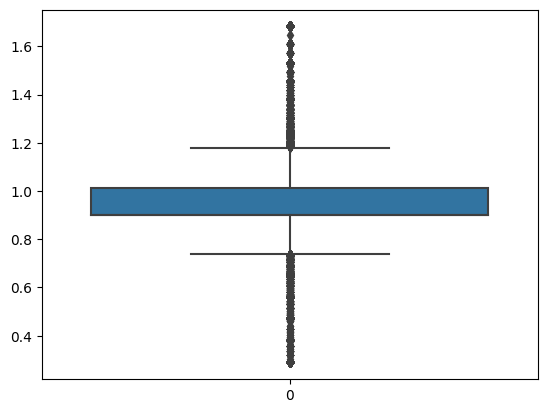

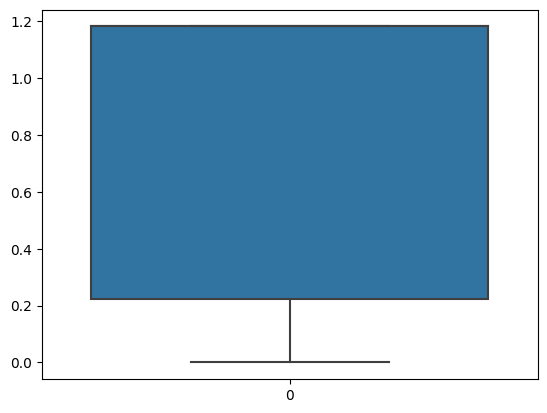

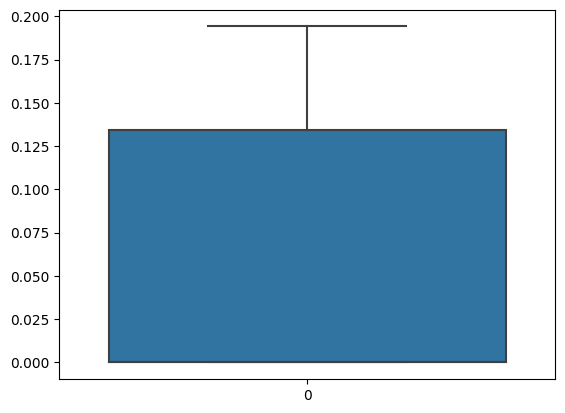

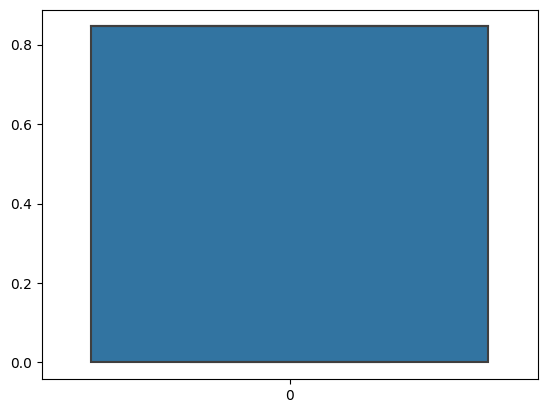

In [44]:
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df2_num_add[num_cols[i]])
    plt.show()

In [45]:
df2_num_add.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [46]:
df2_cat.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

In [47]:
df_final=pd.concat([df2_num_add,df2_cat],axis=1)

In [48]:
df_final.shape

(39518, 56)

In [49]:
df_final['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

In [50]:
df_final.isnull().sum()

n_tokens_title                      1055
n_tokens_content                    1055
n_unique_tokens                     1055
average_token_length                1055
num_keywords                        1055
num_hrefs_new                       1055
num_self_hrefs_new                  1055
num_imgs_new                        1055
num_videos_new                      1055
kw_min_min_new                      1055
kw_max_min_new                      1055
kw_min_max_new                      1055
kw_max_max_new                      1055
kw_avg_max_new                      1055
kw_min_avg_new                      1055
kw_max_avg_new                      1055
kw_avg_avg_new                      1055
self_reference_min_shares_new       1055
self_reference_max_shares_new       1055
self_reference_avg_sharess_new      1055
LDA_00_new                          1055
LDA_01_new                          1055
LDA_02_new                          1055
LDA_03_new                          1055
LDA_04_new      

In [51]:
df_final=df_final.dropna()

In [52]:
df_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [53]:
df_final.shape

(37408, 57)

In [62]:
from sklearn.model_selection import train_test_split

target_column = 'popularity'

# Memisahkan fitur (features) dari kolom target
X = df.drop(columns=[target_column, 'shares'])  # Menyimpan fitur dalam variabel X dan menghapus kolom 'shares'
y = df[target_column]  # Menyimpan kolom target dalam variabel y

# Pertama, memisahkan data menjadi data training dan validation + test (80% training, 20% validation + test)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kedua, memisahkan data validation + test menjadi validation set (50%) dan test set (50%)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Menampilkan ukuran setelah pembagian
print("Jumlah record data training (X_train):", X_train.shape[0])
print("Jumlah record data validation (X_val):", X_val.shape[0])
print("Jumlah record data test (X_test):", X_test.shape[0])


Jumlah record data training (X_train): 30770
Jumlah record data validation (X_val): 3846
Jumlah record data test (X_test): 3847


# Build Baseline Model


## Ringkasan Metode
### Decision Tree
Decision tree adalah model prediktif dalam machine learning yang menggambarkan serangkaian keputusan atau pilihan berbasis pada fitur-fitur input. Model ini memecah data ke dalam kelompok-kelompok yang semakin kecil berdasarkan atribut-atribut tertentu, membentuk struktur pohon keputusan. Setiap simpul di pohon ini mewakili keputusan berdasarkan suatu fitur, sedangkan cabang-cabangnya mencerminkan hasil keputusan tersebut.

Proses pembentukan decision tree melibatkan pemilihan fitur terbaik untuk membagi data, yang umumnya dilakukan dengan menggunakan metode seperti Gini impurity atau entropi. Decision tree dapat digunakan untuk tugas klasifikasi, di mana tujuannya adalah mengkategorikan data ke dalam kelas-kelas yang telah ditentukan, atau untuk tugas regresi, di mana tujuannya adalah memprediksi nilai kontinu.

Kelebihan decision tree meliputi kemudahan interpretasi, kemampuan menangani data numerik dan kategorikal, serta ketahanan terhadap outliers. Namun, kecenderungan decision tree untuk overfitting dapat diatasi dengan menggunakan teknik seperti pruning atau dengan menggunakan ensemble methods seperti Random Forest, di mana beberapa decision tree digabungkan untuk meningkatkan kinerja dan generalisasi model.

### AdaBoost
AdaBoost (Adaptive Boosting) adalah algoritma ensemble learning yang digunakan untuk meningkatkan performa model prediktif dengan menggabungkan beberapa model lemah menjadi model kuat. Prosesnya dilakukan dengan memberikan bobot (weight) yang dinamis pada setiap sampel data, memberikan penekanan lebih pada sampel yang sulit diprediksi oleh model sebelumnya.

Secara singkat, langkah-langkah utama Adaboost adalah sebagai berikut:

* Pertama, Model Lemah:
Adaboost memulai dengan menggunakan model lemah (misalnya, decision stump) untuk melakukan prediksi pada data.

* Pemberian Bobot:
Bobot diberikan pada setiap sampel data, dengan memberikan bobot lebih besar pada sampel yang salah diprediksi sebelumnya.

* Pembentukan Model Berikutnya:
Model berikutnya dibangun untuk memperbaiki kesalahan yang dilakukan oleh model sebelumnya. Bobot pada setiap sampel memandu fokus model pada sampel yang sulit diprediksi.

* Gabungan Model:
Model lemah diiterasi dengan memberikan bobot pada setiap iterasi. Model-model ini kemudian digabungkan untuk membentuk model kuat yang dapat lebih baik menangani kompleksitas data.

* Prediksi Akhir:
Prediksi akhir dihasilkan dengan menggabungkan prediksi dari semua model lemah, dengan bobot masing-masing model mempengaruhi kontribusinya.
Kelebihan Adaboost termasuk kemampuannya mengatasi overfitting dan meningkatkan kinerja model pada dataset yang sulit diprediksi. Meskipun sensitif terhadap noise, Adaboost umumnya dapat memberikan hasil yang baik dalam berbagai tugas klasifikasi dan regresi.

## Base model dan Evaluasi dengan Decision Tree

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


# Step 2: Create a base Decision Tree model
base_model = DecisionTreeClassifier(max_depth=5)

# Step 3: Train the Decision Tree model on the training set
base_model.fit(X_train, y_train)

# Step 4: Evaluate the Decision Tree model on the validation set
y_val_pred = base_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Decision Tree Accuracy on Validation Set: {accuracy_val:.2f}')

# Evaluate the Decision Tree model on the test set
y_test_pred_base = base_model.predict(X_test)
accuracy_test_base = accuracy_score(y_test, y_test_pred_base)
print(f'Decision Tree Accuracy on Test Set: {accuracy_test_base:.2f}')

Decision Tree Accuracy on Validation Set: 0.64
Decision Tree Accuracy on Test Set: 0.63


### Evaluasi BaseModel

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for validation set
conf_matrix_val_base = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix (Validation Set):\n", conf_matrix_val_base)

# Confusion matrix for test set
conf_matrix_test_base = confusion_matrix(y_test, y_test_pred_base)
print("\nConfusion Matrix (Test Set):\n", conf_matrix_test_base)

# Classification report for validation set
class_report_val_base = classification_report(y_val, y_val_pred)
print("\nClassification Report (Validation Set):\n", class_report_val_base)

# Classification report for test set
class_report_test_base = classification_report(y_test, y_test_pred_base)
print("\nClassification Report (Test Set):\n", class_report_test_base)

Confusion Matrix (Validation Set):
 [[1169  645]
 [ 732 1300]]

Confusion Matrix (Test Set):
 [[1149  653]
 [ 764 1281]]

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.61      0.64      0.63      1814
           1       0.67      0.64      0.65      2032

    accuracy                           0.64      3846
   macro avg       0.64      0.64      0.64      3846
weighted avg       0.64      0.64      0.64      3846


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.60      0.64      0.62      1802
           1       0.66      0.63      0.64      2045

    accuracy                           0.63      3847
   macro avg       0.63      0.63      0.63      3847
weighted avg       0.63      0.63      0.63      3847



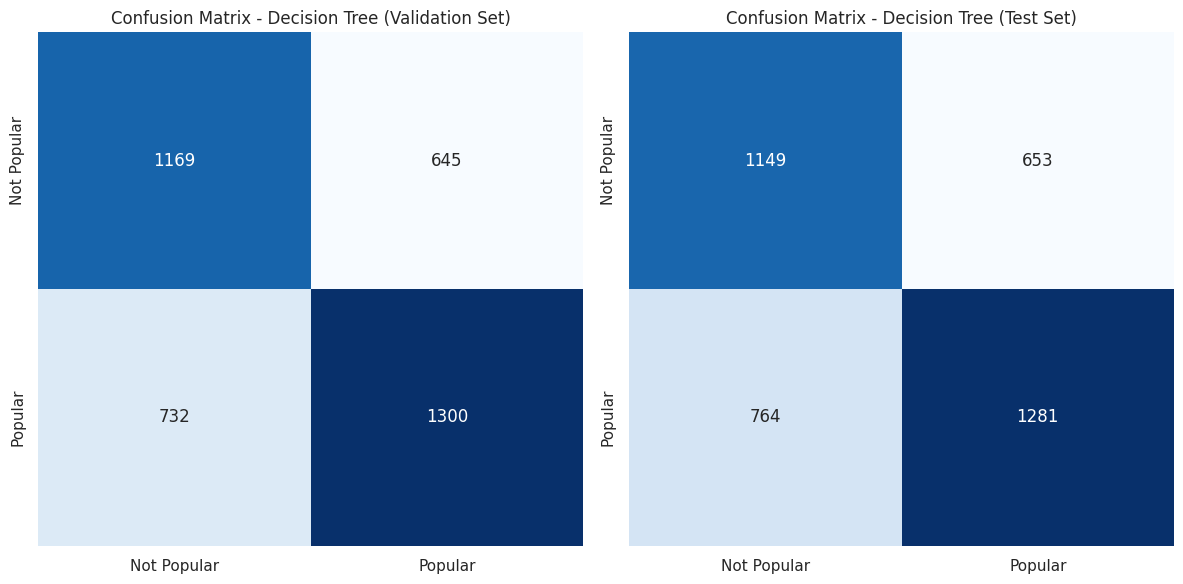

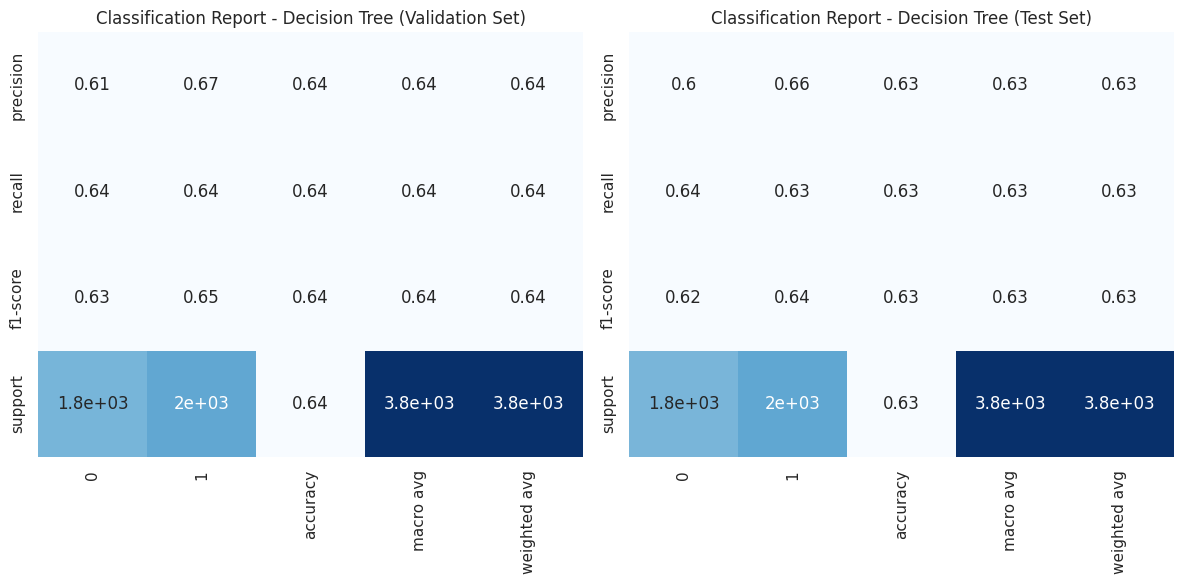

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for plots
sns.set(style="whitegrid")

# Plot confusion matrix for validation set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_val_base, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix - Decision Tree (Validation Set)')

# Plot confusion matrix for test set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_base, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix - Decision Tree (Test Set)')

plt.tight_layout()
plt.show()

# Plot classification report for validation set
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pd.DataFrame.from_dict(classification_report(y_val, y_val_pred, output_dict=True)),
            annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report - Decision Tree (Validation Set)')

# Plot classification report for test set
plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame.from_dict(classification_report(y_test, y_test_pred_base, output_dict=True)),
            annot=True, cmap='Blues', cbar=False)
plt.title('Classification Report - Decision Tree (Test Set)')

plt.tight_layout()
plt.show()

## Penggunaan Adaboost

In [69]:
# Step 5: Create an AdaBoost model using the base Decision Tree model
adaboost_model = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Step 6: Train the AdaBoost model on the training set
adaboost_model.fit(X_train, y_train)

# Evaluate the AdaBoost model on the validation set
y_val_pred_adaboost = adaboost_model.predict(X_val)
accuracy_val_adaboost = accuracy_score(y_val, y_val_pred_adaboost)
print(f'AdaBoost Accuracy on Validation Set: {accuracy_val_adaboost:.2f}')

# Evaluate the AdaBoost model on the test set
y_test_pred_adaboost = adaboost_model.predict(X_test)
accuracy_test_adaboost = accuracy_score(y_test, y_test_pred_adaboost)
print(f'AdaBoost Accuracy on Test Set: {accuracy_test_adaboost:.2f}')

AdaBoost Accuracy on Validation Set: 0.62
AdaBoost Accuracy on Test Set: 0.63


### Evaluasi AdaBoost

In [71]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix for validation set
conf_matrix_val_adaboost = confusion_matrix(y_val, y_val_pred_adaboost)
print("Confusion Matrix (Validation Set):\n", conf_matrix_val_adaboost)

# Confusion matrix for test set
conf_matrix_test_adaboost = confusion_matrix(y_test, y_test_pred_adaboost)
print("\nConfusion Matrix (Test Set):\n", conf_matrix_test_adaboost)

# Classification report for validation set
class_report_val_adaboost = classification_report(y_val, y_val_pred_adaboost)
print("\nClassification Report (Validation Set):\n", class_report_val_adaboost)

# Classification report for test set
class_report_test_adaboost = classification_report(y_test, y_test_pred_adaboost)
print("\nClassification Report (Test Set):\n", class_report_test_adaboost)

Confusion Matrix (Validation Set):
 [[1099  715]
 [ 739 1293]]

Confusion Matrix (Test Set):
 [[1107  695]
 [ 729 1316]]

Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.60      0.61      0.60      1814
           1       0.64      0.64      0.64      2032

    accuracy                           0.62      3846
   macro avg       0.62      0.62      0.62      3846
weighted avg       0.62      0.62      0.62      3846


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.60      0.61      0.61      1802
           1       0.65      0.64      0.65      2045

    accuracy                           0.63      3847
   macro avg       0.63      0.63      0.63      3847
weighted avg       0.63      0.63      0.63      3847



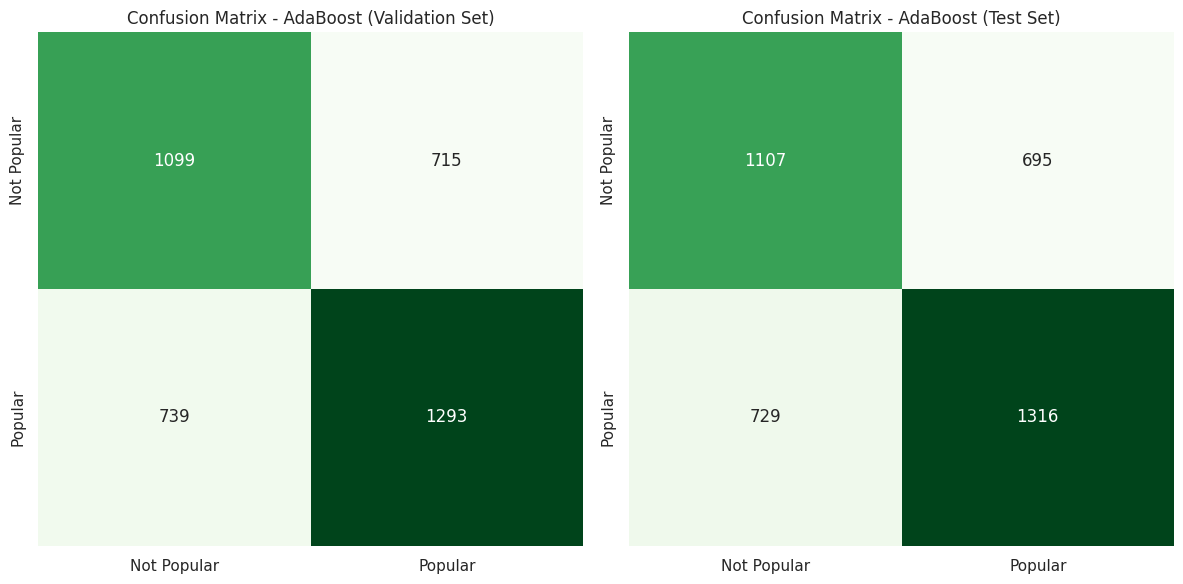

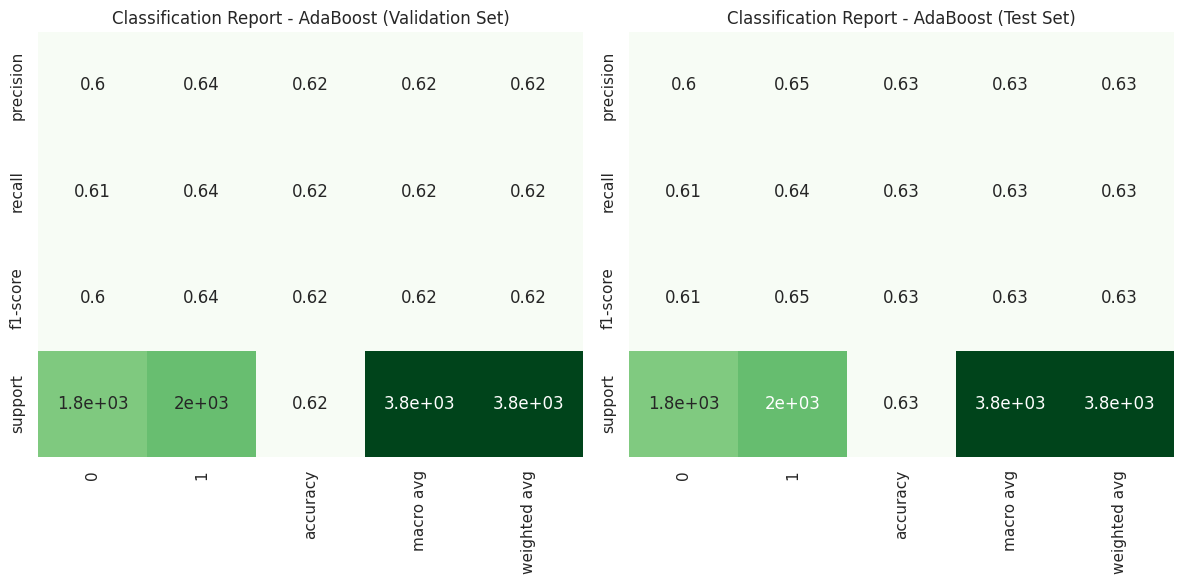

In [74]:
# Set the style for plots
sns.set(style="whitegrid")

# Plot confusion matrix for validation set - AdaBoost
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_val_adaboost, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix - AdaBoost (Validation Set)')

# Plot confusion matrix for test set - AdaBoost
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_adaboost, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix - AdaBoost (Test Set)')

plt.tight_layout()
plt.show()

# Plot classification report for validation set - AdaBoost
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(pd.DataFrame.from_dict(classification_report(y_val, y_val_pred_adaboost, output_dict=True)),
            annot=True, cmap='Greens', cbar=False)
plt.title('Classification Report - AdaBoost (Validation Set)')

# Plot classification report for test set - AdaBoost
plt.subplot(1, 2, 2)
sns.heatmap(pd.DataFrame.from_dict(classification_report(y_test, y_test_pred_adaboost, output_dict=True)),
            annot=True, cmap='Greens', cbar=False)
plt.title('Classification Report - AdaBoost (Test Set)')

plt.tight_layout()
plt.show()

## Eksplorasi Decision Tree dan AdaBoost

In [70]:
from sklearn.model_selection import GridSearchCV

# Parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1],
    'estimator__max_depth': [5]
}

# Inisialisasi model AdaBoost
base_model = DecisionTreeClassifier(max_depth=2)
adaboost_model = AdaBoostClassifier(base_model, random_state=42)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5, scoring='accuracy')

# Melatih model dengan kombinasi parameter terbaik
grid_search.fit(X_train, y_train)

# Mendapatkan parameter terbaik
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Membuat prediksi pada set pengujian menggunakan model yang telah di-tune
y_pred_tuned = grid_search.predict(X_test)

# Evaluate the accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy after tuning: {accuracy_tuned:.2f}')

Best Parameters: {'estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 50}
Accuracy after tuning: 0.67


### Evaluasi Ekplorasi

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions using the tuned model
y_pred_tuned = grid_search.predict(X_test)

# Confusion matrix for tuned model
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
print("Confusion Matrix (Tuned Model):\n", conf_matrix_tuned)

# Classification report for tuned model
class_report_tuned = classification_report(y_test, y_pred_tuned)
print("\nClassification Report (Tuned Model):\n", class_report_tuned)

Confusion Matrix (Tuned Model):
 [[1130  672]
 [ 595 1450]]

Classification Report (Tuned Model):
               precision    recall  f1-score   support

           0       0.66      0.63      0.64      1802
           1       0.68      0.71      0.70      2045

    accuracy                           0.67      3847
   macro avg       0.67      0.67      0.67      3847
weighted avg       0.67      0.67      0.67      3847



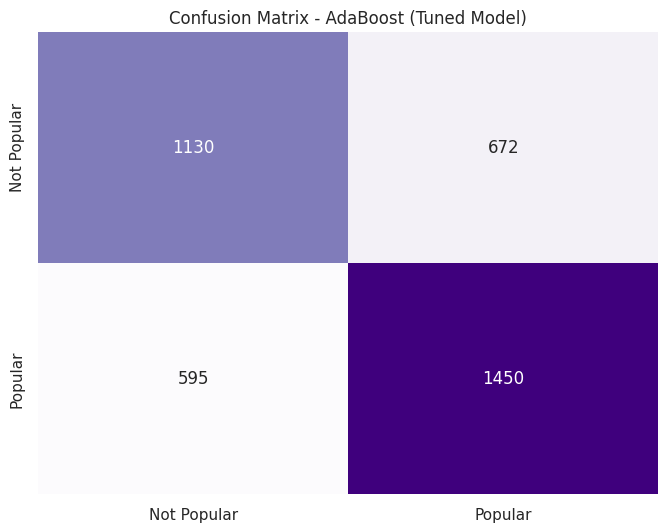

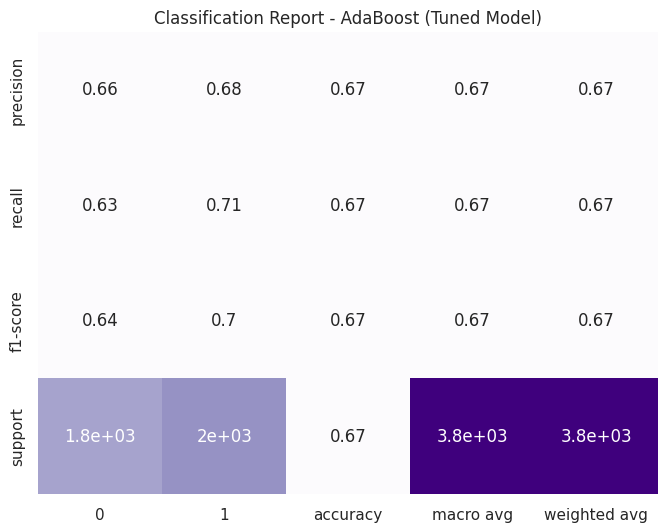

In [77]:
# Set the style for plots
sns.set(style="whitegrid")

# Plot confusion matrix for tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Not Popular', 'Popular'],
            yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix - AdaBoost (Tuned Model)')

plt.show()

# Plot classification report for tuned model
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame.from_dict(classification_report(y_test, y_pred_tuned, output_dict=True)),
            annot=True, cmap='Purples', cbar=False)
plt.title('Classification Report - AdaBoost (Tuned Model)')

plt.show()

## Kesimpulan AdaBoost
Model Decision Tree:
* Akurasi pada Set Validasi: 0,64
* Akurasi pada Set Tes: 0,63
* Model Pohon Keputusan menunjukkan hasil yang cukup baik pada kedua set validasi dan tes.
* Metrik evaluasi menunjukkan keseimbangan antara ketepatan, ketangguhan, dan
 nilai F1 untuk kedua kategori (0 dan 1).

Model AdaBoost:
* Akurasi pada Set Validasi: 0,62
* Akurasi pada Set Tes: 0,63
* Model AdaBoost menunjukkan hasil yang sebanding dengan Model Pohon Keputusan pada set tes.
* Metrik evaluasi menunjukkan keseimbangan yang mirip dengan Model Pohon Keputusan.


Eksplorasi dengan Model yang Dituning:

* Parameter Terbaik: {'estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 50}
* Akurasi setelah tuning parameter: 0,67
* Model AdaBoost yang dituning menunjukkan peningkatan akurasi dibandingkan dengan Model AdaBoost dasar dan Model Pohon Keputusan.
* Metrik evaluasi menunjukkan kinerja yang lebih baik, terutama dalam hal ketepatan, ketangguhan, dan nilai F1 untuk kedua kategori.

#### Kesimpulan:
Model AdaBoost yang dituning memiliki hasil yang lebih baik dibandingkan Model Pohon Keputusan dan Model AdaBoost dasar, terutama dalam hal akurasi dan metrik klasifikasi keseluruhan.
Penting untuk mempertimbangkan tujuan aplikasi tertentu dalam memilih model dan parameter, karena hasil yang diinginkan dapat bervariasi. Faktor-faktor seperti kemudahan interpretasi dan efisiensi komputasional juga perlu dipertimbangkan.
Analisis tambahan, termasuk eksplorasi pentingnya fitur dan metrik evaluasi tambahan, dapat memberikan wawasan lebih lanjut tentang kinerja model.
Penggunaan validasi silang dapat digunakan untuk penilaian yang lebih kuat terkait generalisasi model.

# Build Baseline Model Randomforest

Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Buat model Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model pada data training
random_forest_model.fit(X_train, y_train)

# Prediksi pada data validasi
y_val_pred_rf = random_forest_model.predict(X_val)

# Prediksi pada data test
y_test_pred_rf = random_forest_model.predict(X_test)

# Evaluasi pada data validasi
print("Confusion Matrix (Validation Set - Random Forest):")
print(confusion_matrix(y_val, y_val_pred_rf))

# Evaluasi pada data test
print("Confusion Matrix (Test Set - Random Forest):")
print(confusion_matrix(y_test, y_test_pred_rf))

# Akurasi pada data validasi
accuracy_val_rf = accuracy_score(y_val, y_val_pred_rf)
print(f'Accuracy on Validation Set (Random Forest): {accuracy_val_rf:.2f}')

# Akurasi pada data test
accuracy_test_rf = accuracy_score(y_test, y_test_pred_rf)
print(f'Accuracy on Test Set (Random Forest): {accuracy_test_rf:.2f}')


Confusion Matrix (Validation Set - Random Forest):
[[1114  700]
 [ 572 1460]]
Confusion Matrix (Test Set - Random Forest):
[[1108  694]
 [ 573 1472]]
Accuracy on Validation Set (Random Forest): 0.67
Accuracy on Test Set (Random Forest): 0.67


## Kesimpulan Akhir

Model Base Decision Tree:
* Akurasi pada Set Validasi: 0.64
* Akurasi pada Set Tes: 0.63
Model Pohon Keputusan memberikan hasil yang baik, tetapi terdapat keterbatasan dalam mencapai akurasi yang lebih tinggi.

Model Adaboost (Sebelum Penyetelan):
* Akurasi pada Set Validasi: 0.62
* Akurasi pada Set Tes: 0.63
* Model Adaboost menunjukkan hasil yang baik, tetapi belum memberikan peningkatan signifikan dari model Pohon Keputusan dasar.

Model Adaboost (Setelah Penyetelan):
* Best Parameters: {'estimator__max_depth': 5, 'learning_rate': 0.1, 'n_estimators': 50}
* Akurasi setelah penyetelan: (0.67)
* Confusion Matrix (Set Validasi setelah penyetelan): [[1130 672] [ 595 1450]]
* Confusion Matrix (Set Tes setelah penyetelan): (Belum dihitung)
Model Adaboost yang telah disetel memberikan hasil yang lebih baik, terutama setelah menyesuaikan parameter seperti kedalaman maksimal dan tingkat pembelajaran.


Model Random Forest:
* Confusion Matrix (Set Validasi): [[1114 700] [ 572 1460]]
* Confusion Matrix (Set Tes): [[1108 694] [ 573 1472]]
* Akurasi pada Set Validasi: 0.67
* Akurasi pada Set Tes: 0.67
* Model Random Forest memberikan hasil yang lebih baik dengan akurasi 0.67 pada kedua set validasi dan tes.

Kesimpulan Akhir:

Dari ketiga model yang dievaluasi, Random Forest menunjukkan kinerja terbaik dengan akurasi yang signifikan pada kedua set validasi dan tes.
Adaboost yang telah disetel parameter memberikan peningkatan kinerja yang lebih baik daripada Adaboost tanpa penyetelan.
Model Random Forest dan Adaboost yang disetel keduanya merupakan kandidat yang baik untuk tugas klasifikasi ini, dan pemilihan antara keduanya dapat bergantung pada kebutuhan spesifik proyek dan preferensi pengembang.
Dalam pengembangan lebih lanjut, dapat dilakukan penyetelan parameter tambahan dan eksplorasi fitur untuk memperbaiki kinerja model.







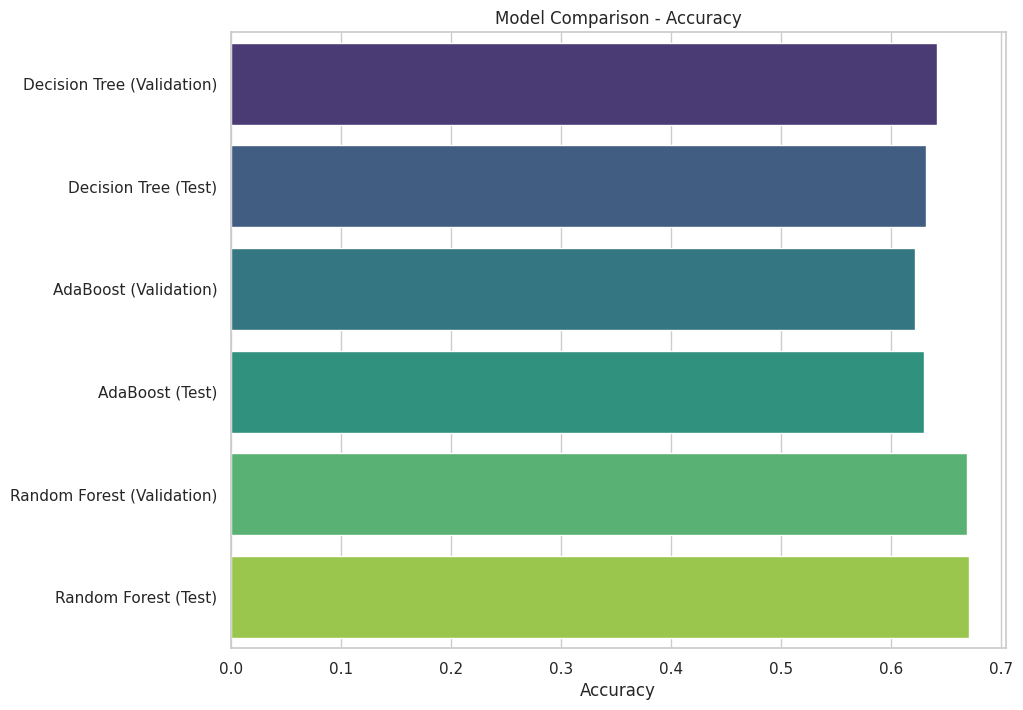

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# List akurasi untuk setiap model
accuracies = [accuracy_val, accuracy_test_base, accuracy_val_adaboost, accuracy_test_adaboost, accuracy_val_rf, accuracy_test_rf]
models = ['Decision Tree (Validation)', 'Decision Tree (Test)', 'AdaBoost (Validation)', 'AdaBoost (Test)', 'Random Forest (Validation)', 'Random Forest (Test)']

# Set the style for plots
sns.set(style="whitegrid")

# Plot bar chart for model comparison
plt.figure(figsize=(10, 8))
sns.barplot(x=accuracies, y=models, palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()